# Mini Project Notebook: Principal Component Analysis PCA

## Dr. Prashanth Kannadaguli
### Founding Chief Research Architect & President
### Dhaarini AI-Tech Research Academy, Bengaluru, India

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# DATASET


*   marketing_campaign.csv
*   Label: Response
*   Features: All other columns

Load the "marketing_campaign.csv" dataset into a Pandas DataFrame.

In [ ]:
data=pd.read_csv('marketing_campaign.csv',sep='\t')
data=pd.DataFrame(data)
print(data.head())
print(type(data))
print(type(data['Dt_Customer']))

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

## EDA

Print the shape, data types, and first few rows of the DataFrame.


In [ ]:
data_types=data.dtypes
print(data_types)
data_100r=data.head(100)
print(data_100r)
print(data.shape)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
       ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0    55

Identify missing values in each column and calculate the percentage of missing data.


In [ ]:
col_names=['ID','Year_Birth','Education',	'Marital_Status',	'Income',	'Kidhome',
           'Teenhome','Dt_Customer',	'Recency','MntWines','MntFruits','MntMeatProducts',
           'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
           'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
           'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Z_CostContact','Z_Revenue',	'Response']

m_v_c = data.isnull().sum()
print(type(m_v_c))
m_v_p = (m_v_c / len(data)) * 100

print("Missing values count per column:")
print(m_v_c)
print("\nPercentage of missing values per column:")
print(m_v_p)





<class 'pandas.core.series.Series'>
Missing values count per column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Percentage of missing values per column:
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.0

Check for any inconsistencies in the data (e.g., invalid values, typos) and correct them.

> Add blockquote



In [ ]:

data['Income'].fillna(data['Income'].mean(), inplace=True)
missing_val_count_after = data.isnull().sum()
print("Missing values count per column after handling:")
print(missing_val_count_after)

Missing values count per column after handling:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


Create histograms for numerical variables to understand their distributions.


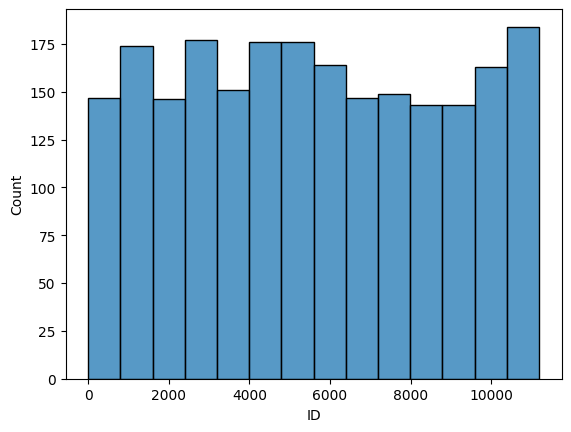

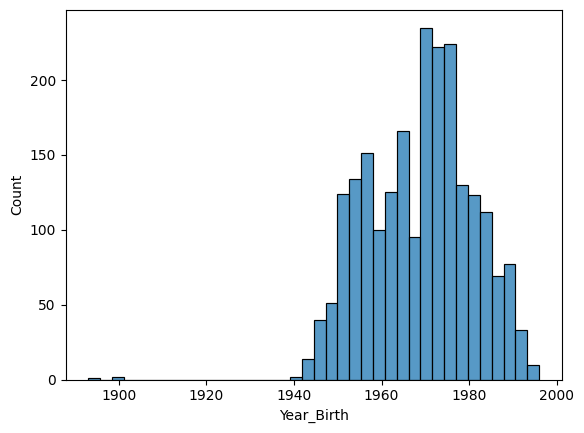

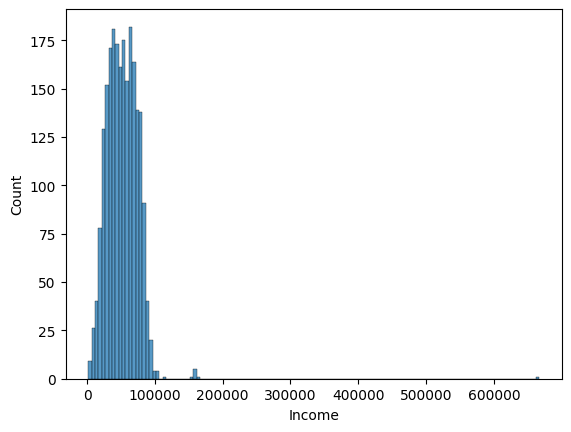

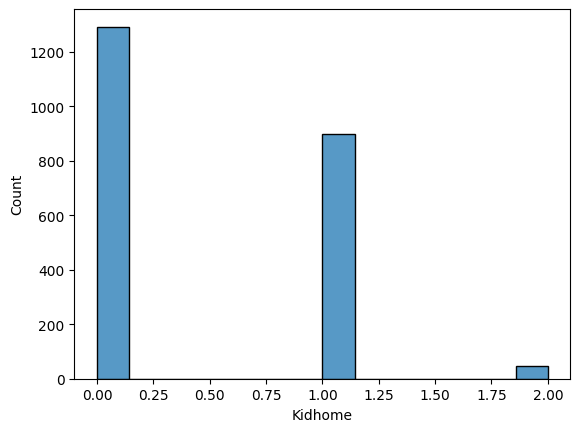

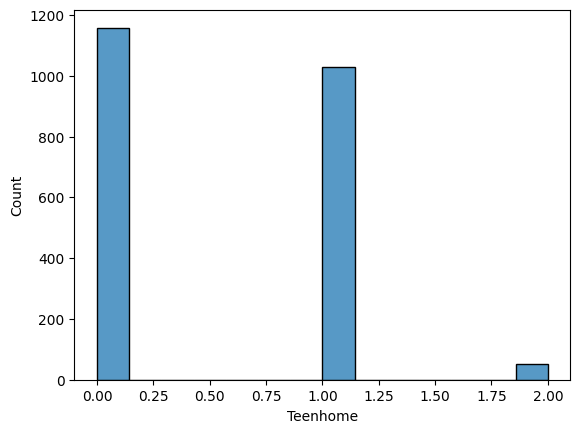

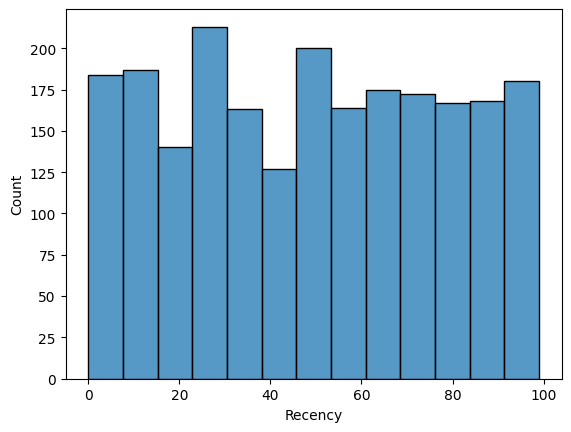

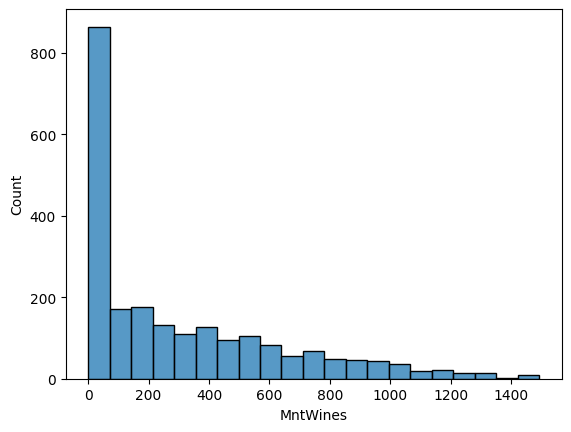

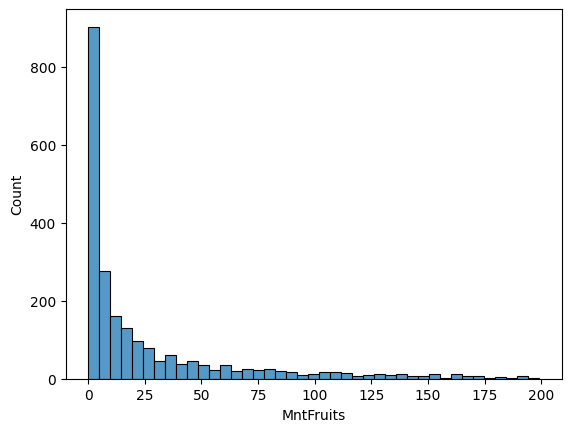

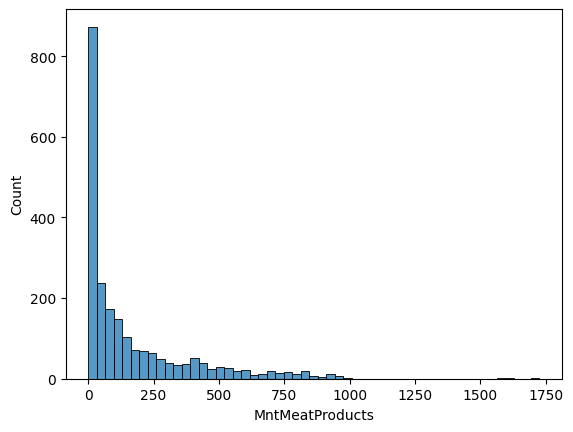

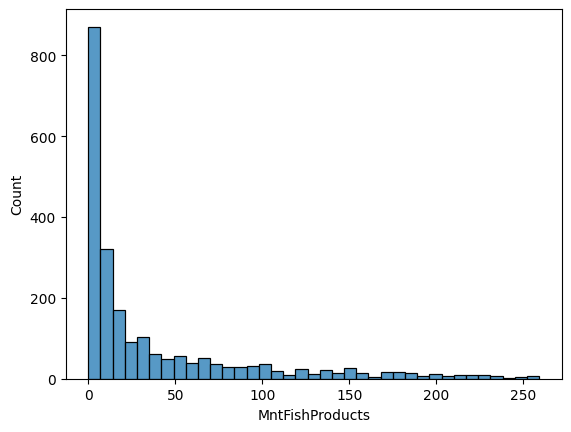

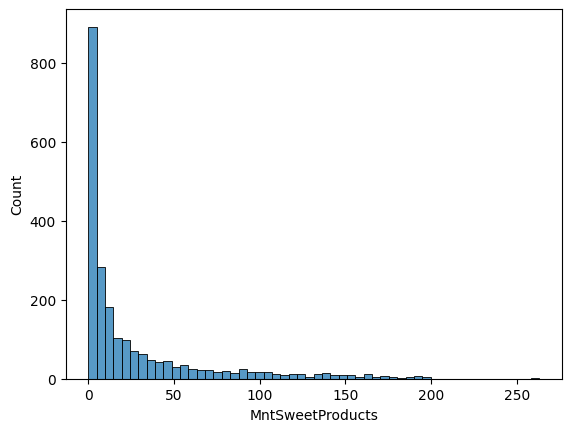

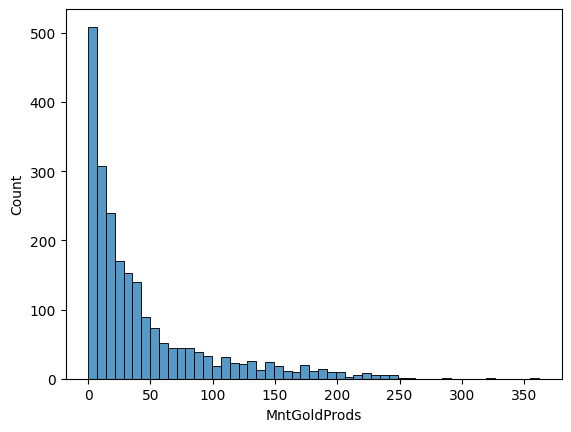

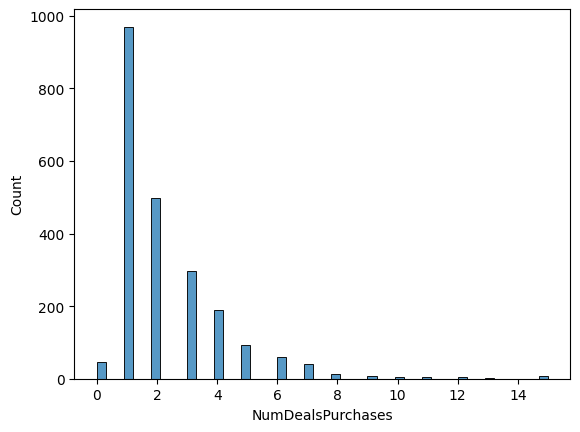

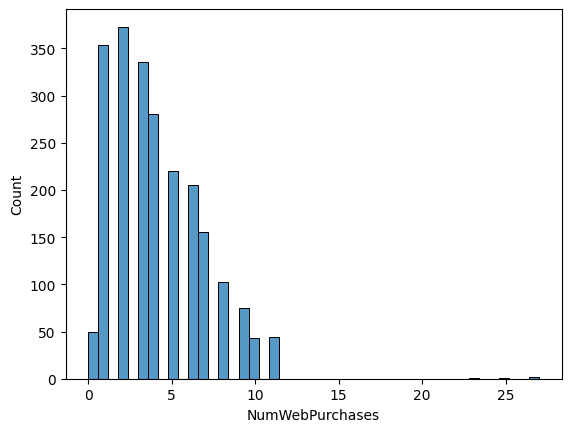

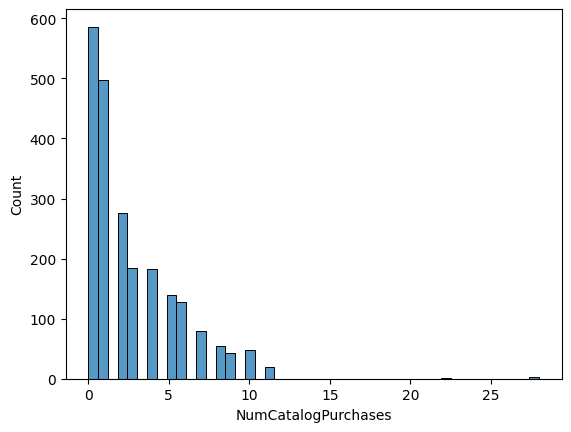

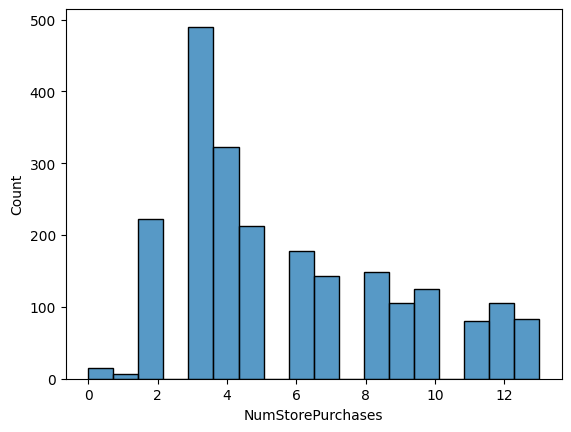

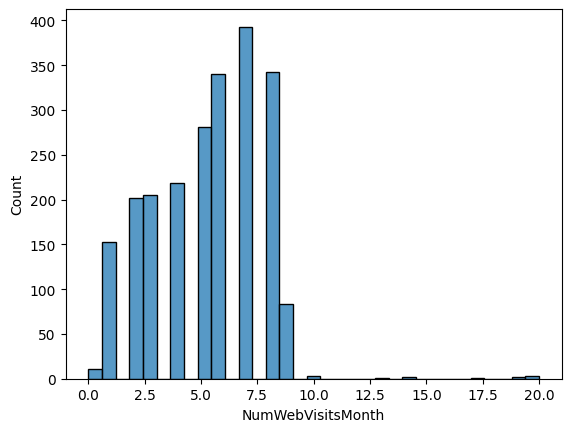

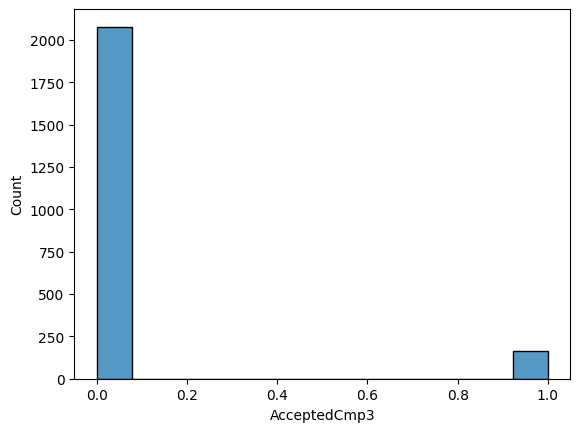

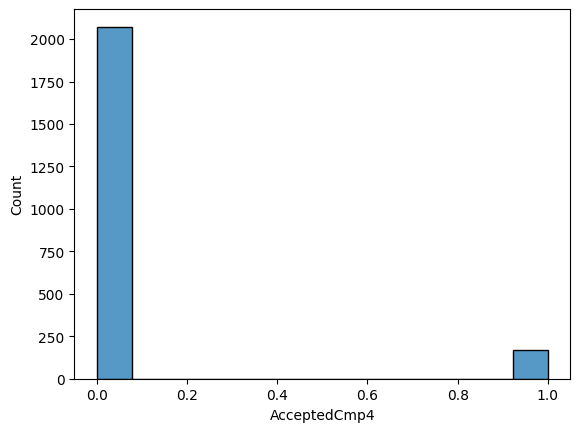

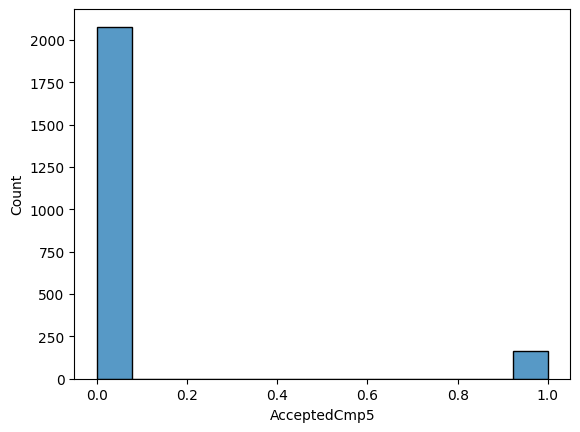

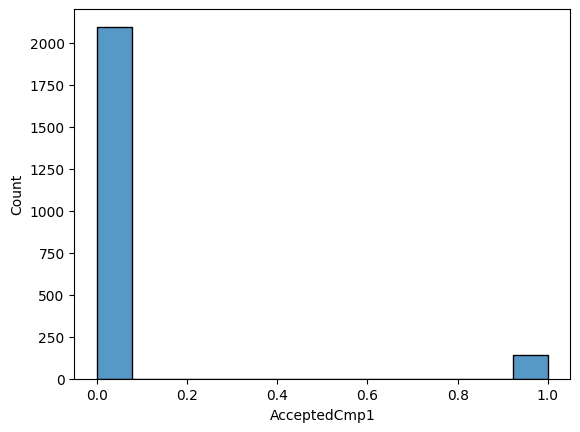

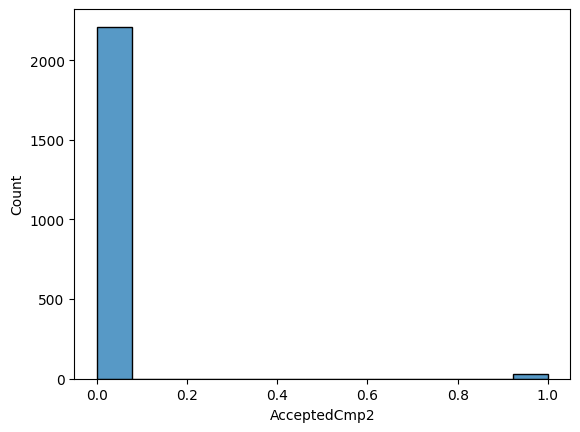

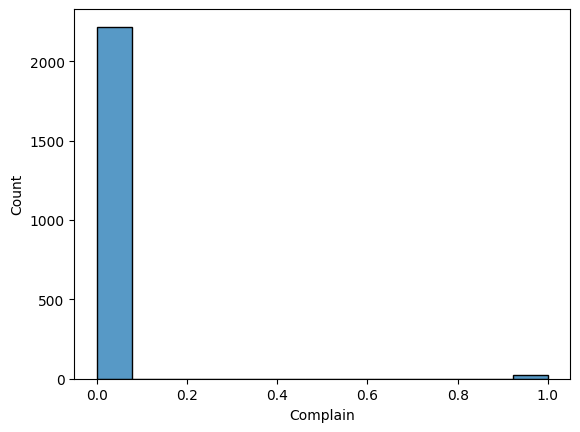

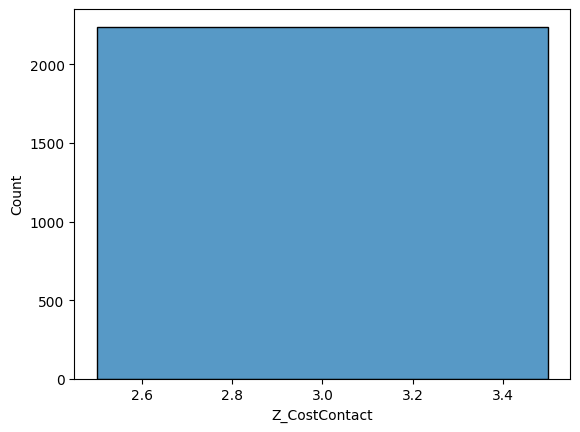

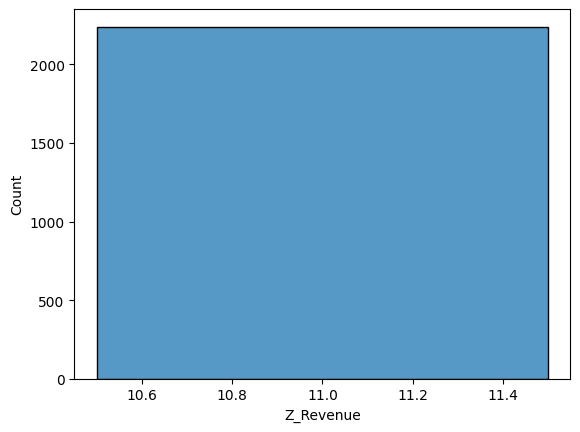

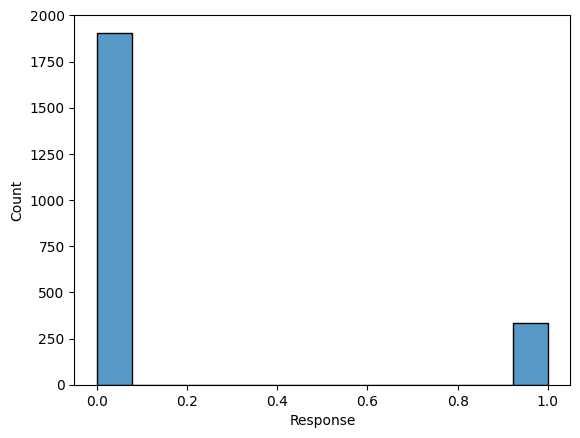

In [ ]:
numerical_cols=['ID','Year_Birth','Income','Kidhome',
           'Teenhome',    'Recency','MntWines','MntFruits','MntMeatProducts',
           'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
           'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
           'AcceptedCmp1',      'AcceptedCmp2', 'Complain',     'Z_CostContact','Z_Revenue',    'Response']

for col in numerical_cols:
    sns.histplot(data=data[col])
    plt.show()

Create bar charts or pie charts for categorical variables to visualize their frequencies.


['Education', 'Marital_Status', 'Dt_Customer']


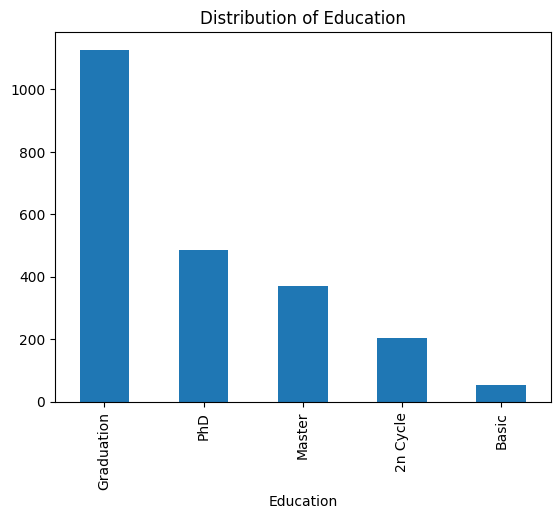

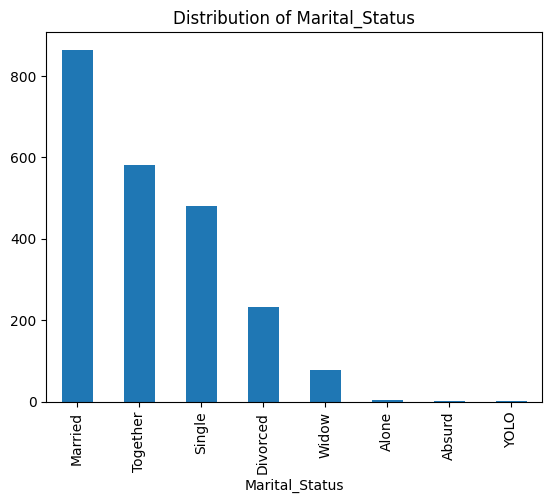

In [ ]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
print(categorical_cols)
if 'Dt_Customer' in categorical_cols:
    categorical_cols.remove('Dt_Customer')

for col in categorical_cols:
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

Compute mean, median, mode, standard deviation, and other summary statistics for numerical variables.


In [ ]:
print(numerical_cols)
for col in numerical_cols:
  mean=data[col].mean()
  median=data[col].median()
  mode=data[col].mode()
  std=data[col].std()

  print(f'mean of {col} is {mean}')
  print(f'median of {col} is {median}')
  print(f'mode of {col} is {mode}')
  print(f'standard deviation of {col} is {std}')

['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
mean of ID is 5592.159821428571
median of ID is 5458.5
mode of ID is 0           0
1           1
2           9
3          13
4          17
        ...  
2235    11178
2236    11181
2237    11187
2238    11188
2239    11191
Name: ID, Length: 2240, dtype: int64
standard deviation of ID is 3246.662197564341
mean of Year_Birth is 1968.8058035714287
median of Year_Birth is 1970.0
mode of Year_Birth is 0    1976
Name: Year_Birth, dtype: int64
standard deviation of Year_Birth is 11.984069456885825
mean of Income is 52247.25135379061
median of Income is 51741.5
mode of Income is 0    52247.251354
N

Calculate the correlation matrix between numerical variables and visualize it using a heatmap.


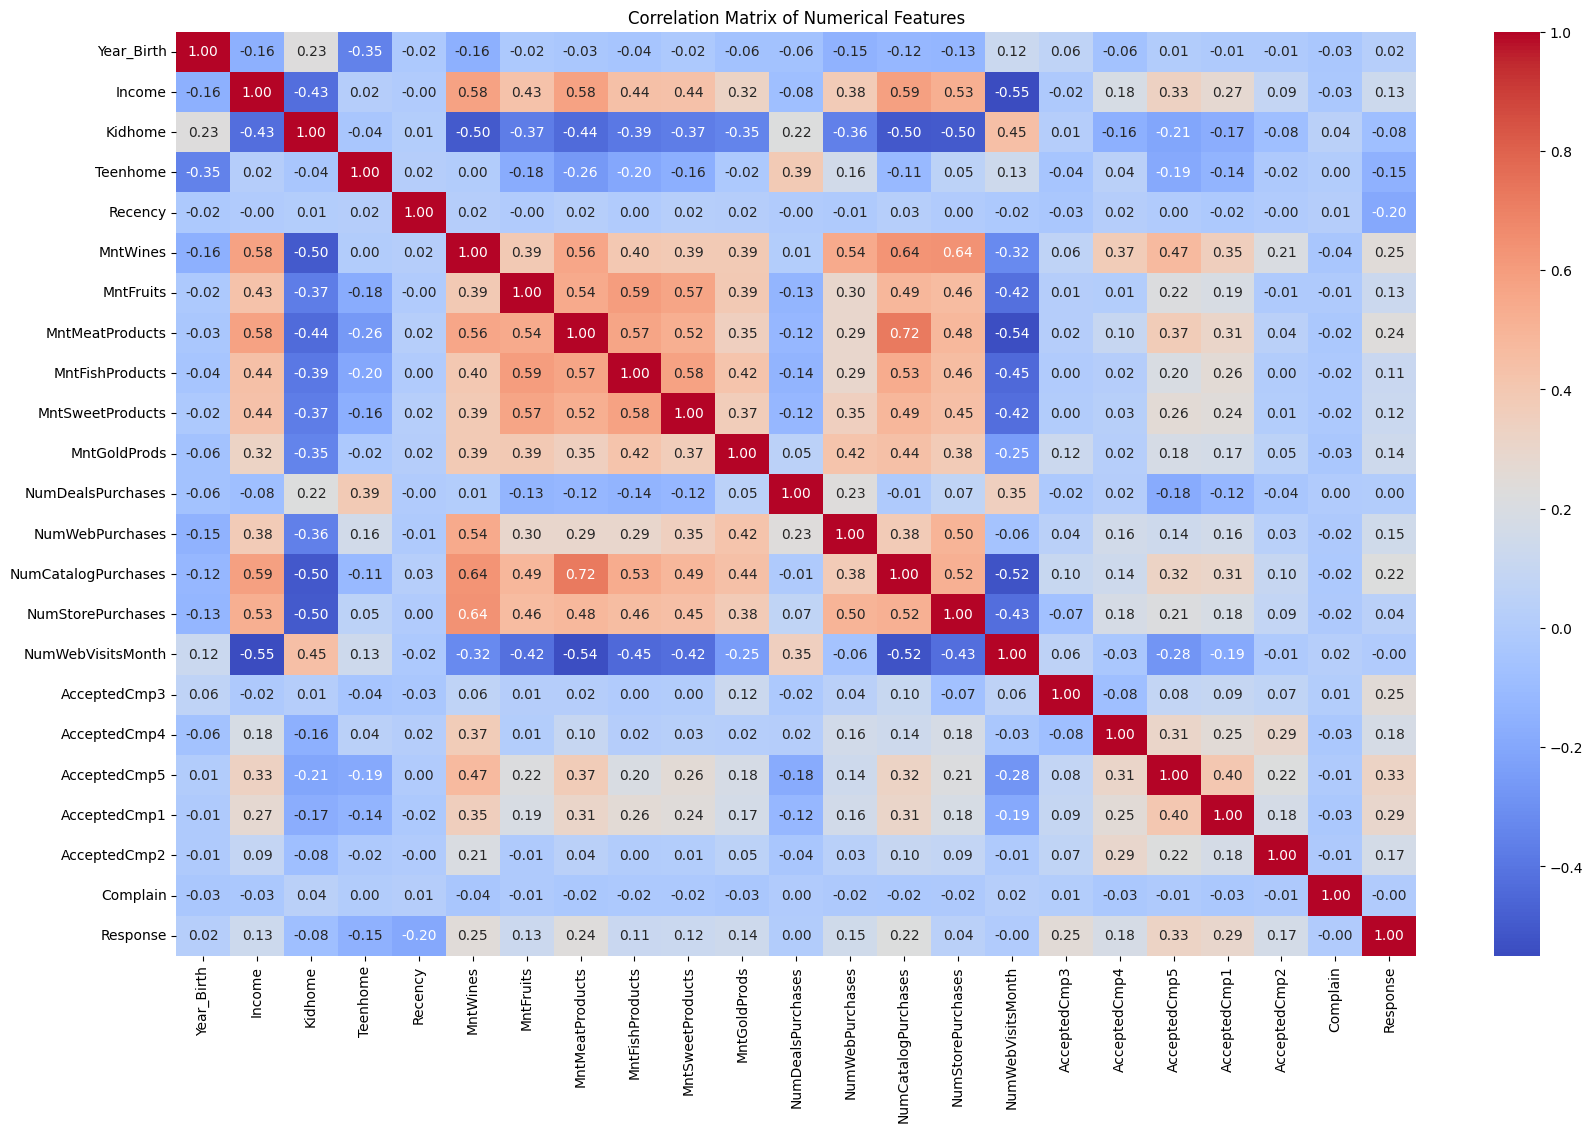

In [ ]:
cols_for_corr = [col for col in numerical_cols if col not in ['ID', 'Z_CostContact', 'Z_Revenue']]

cor_mat = data[cols_for_corr].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(data=cor_mat, annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Create 5 different scatter plots to visualize relationships between pairs of numerical variables (e.g., Income vs. MntWines).


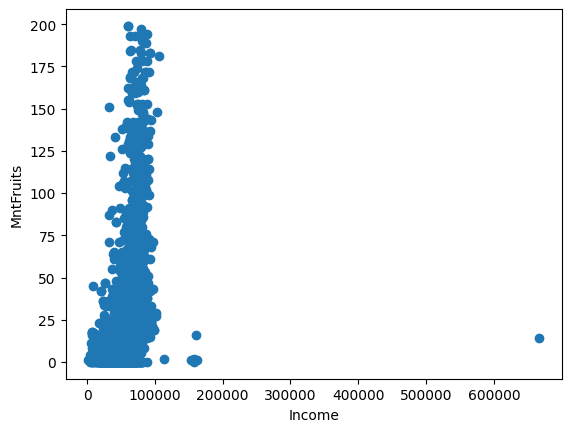

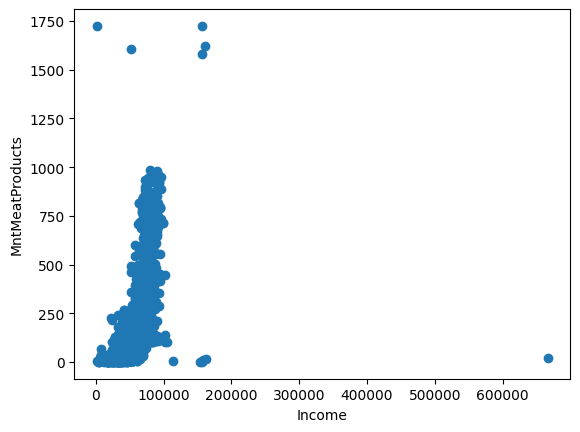

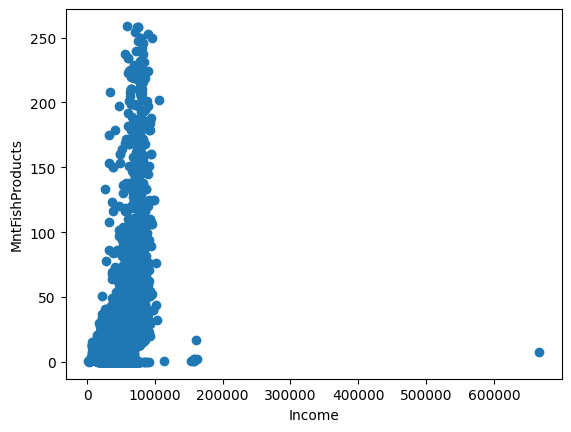

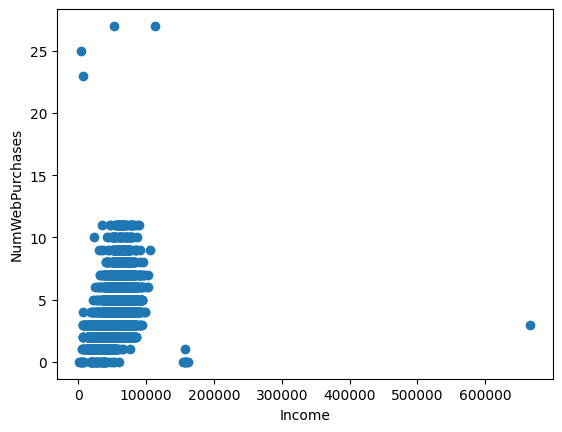

In [ ]:
plt.scatter(data['Income'],data['MntFruits'])
plt.xlabel('Income')
plt.ylabel('MntFruits')
plt.show()

plt.scatter(data['Income'],data['MntMeatProducts'])
plt.xlabel('Income')
plt.ylabel('MntMeatProducts')
plt.show()

plt.scatter(data['Income'],data['MntFishProducts'])
plt.xlabel('Income')
plt.ylabel('MntFishProducts')
plt.show()

plt.scatter(data['Income'],data['NumWebPurchases'])
plt.xlabel('Income')
plt.ylabel('NumWebPurchases')
plt.show()

Create at least 2 box plots to compare distributions of numerical variables across different categories of categorical variables (e.g., MntWines by Education).


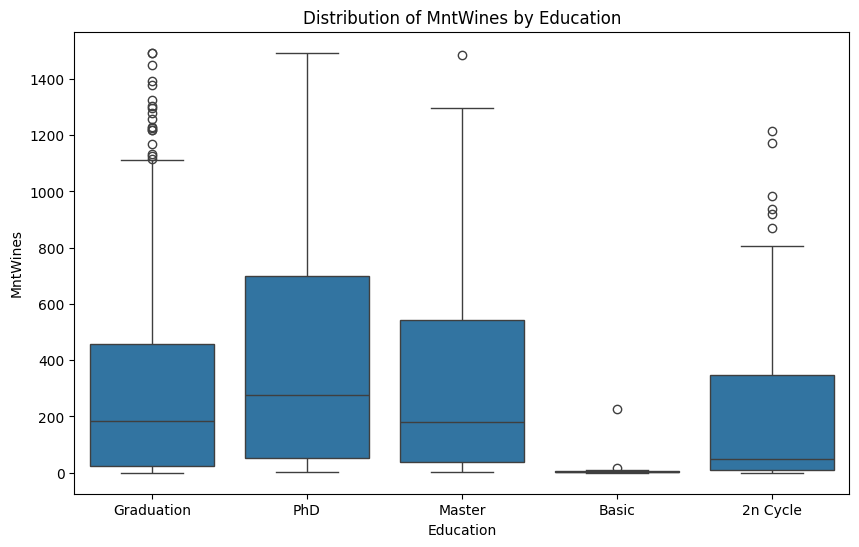

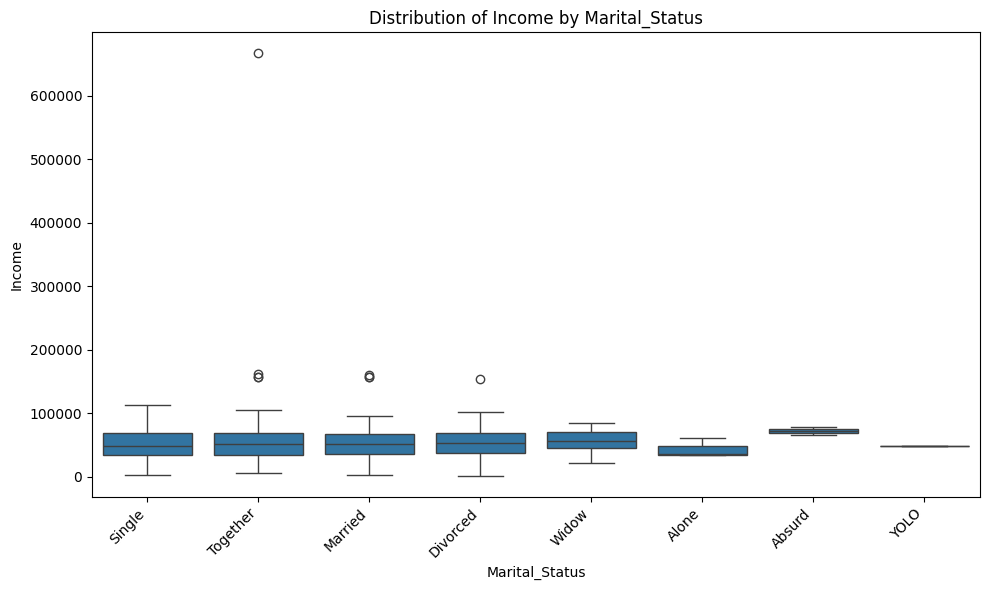

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='MntWines', data=data)
plt.title('Distribution of MntWines by Education')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Income', data=data)
plt.title('Distribution of Income by Marital_Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Convert the Dt_Customer column to a datetime format.


In [ ]:
dt_new = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
print(dt_new)
print(data['Dt_Customer'].dtype)
print(dt_new.dtype)

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]
object
datetime64[ns]


Explore 5 different trends over time using line charts (e.g., MntWines by Dt_Customer).


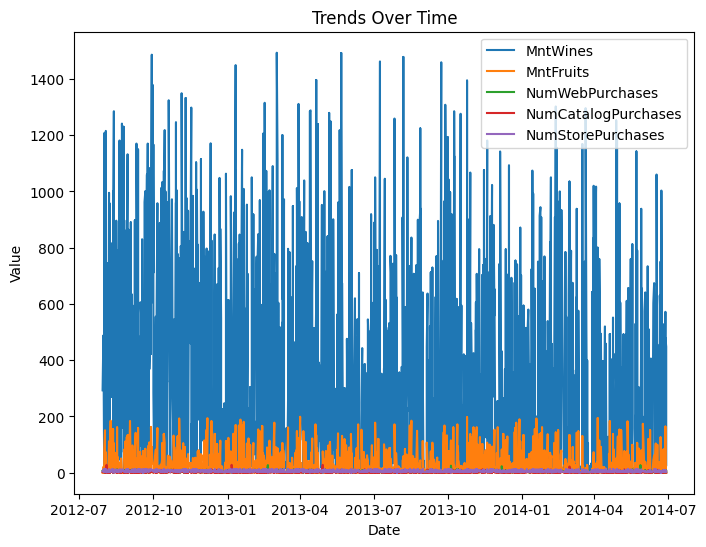

In [ ]:
numerical_cols=['ID','Year_Birth','Income','Kidhome',
           'Teenhome',    'Recency','MntWines','MntFruits','MntMeatProducts',
           'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
           'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
           'AcceptedCmp1',      'AcceptedCmp2', 'Complain',     'Z_CostContact','Z_Revenue',    'Response']



# Sort by index (date) for proper time series plotting
data.sort_index(inplace=True)

# Select 5 numerical columns to plot trends for
columns_to_plot = ['MntWines', 'MntFruits', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Plot the trends
plt.figure(figsize=(8, 6))
for col in columns_to_plot:
    plt.plot(data.index, data[col], label=col)

plt.title('Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Use box plots or scatter plots to identify outliers in numerical variables.


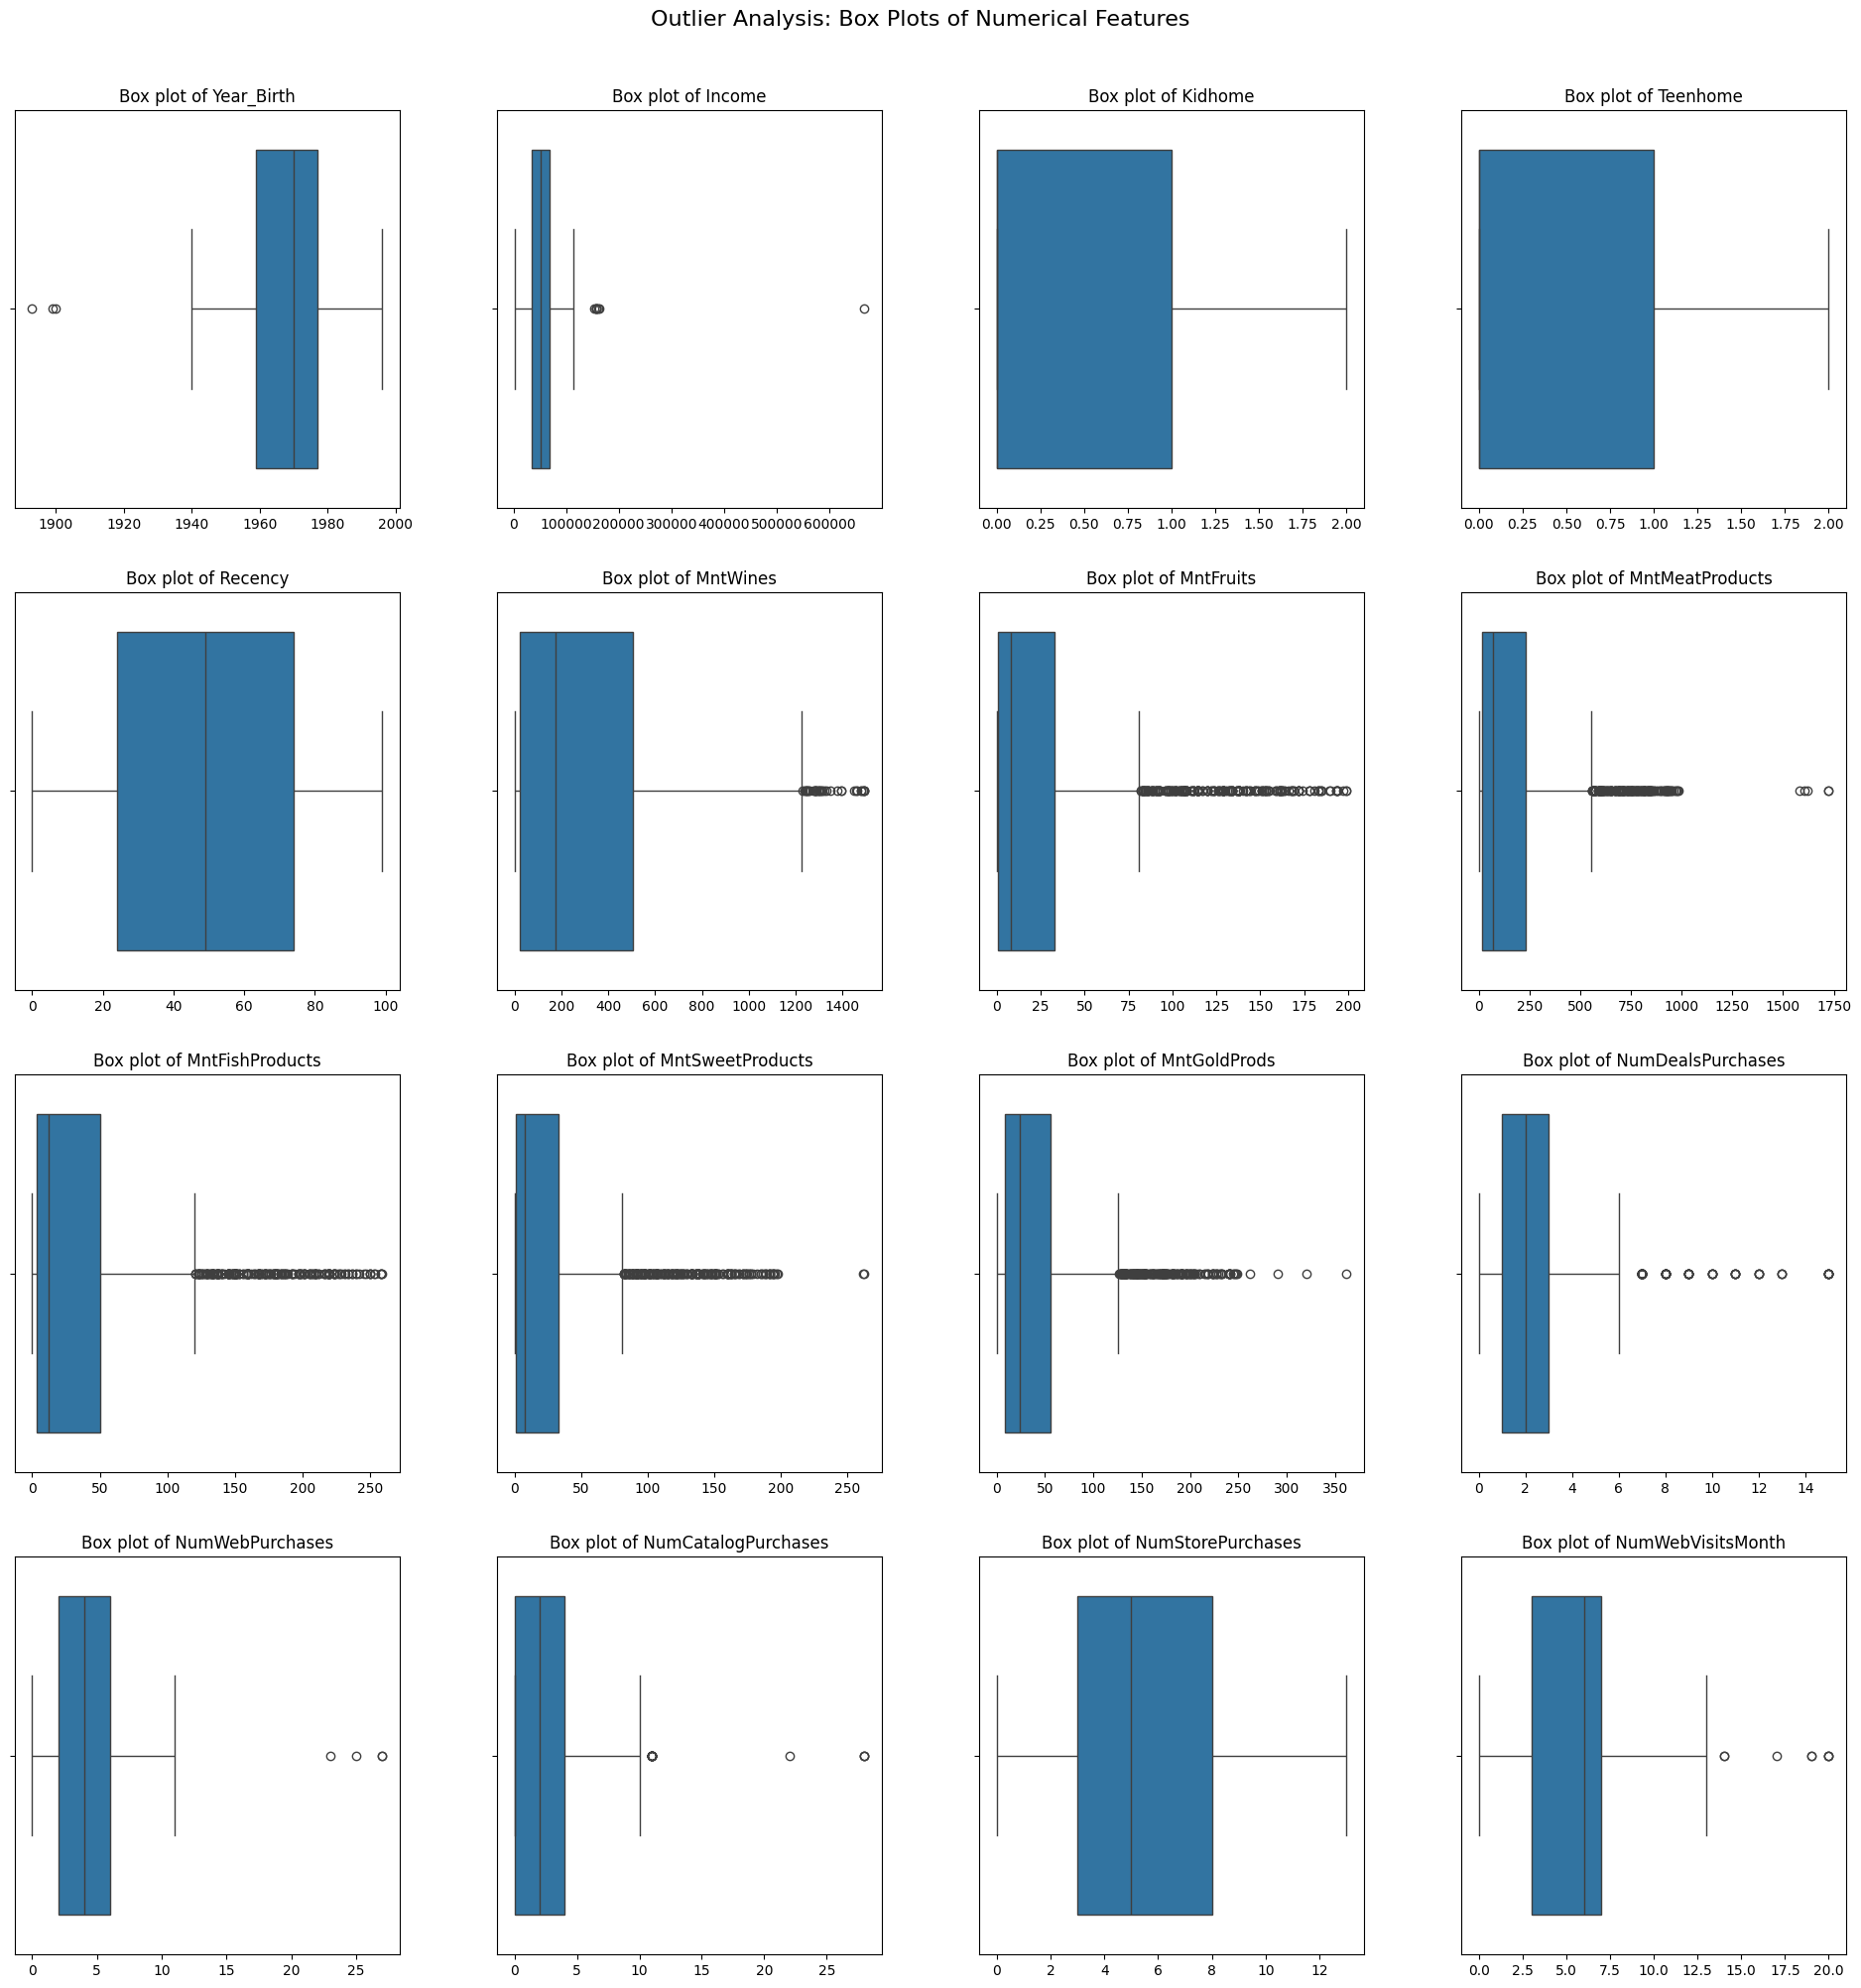

In [ ]:

import math

numerical_cols_new = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth']


n_cols = 4
n_rows = math.ceil(len(numerical_cols_new) / n_cols)

# Create figure with subplots

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.tight_layout(pad=4.0)


axes = axes.flatten()


for i, col in enumerate(numerical_cols_new):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}', fontsize=12)
    axes[i].set_xlabel('')  # Remove x-axis label for cleaner look

# Hide any unused subplots
for j in range(len(numerical_cols_new), len(axes)):
    axes[j].axis('off')

plt.suptitle('Outlier Analysis: Box Plots of Numerical Features', fontsize=16, y=1.02)
plt.show()

Remove outliers using suitable methods of your choice

In [ ]:

continuous_cols = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGol']
data_clean = data.copy()

# Remove outliers using IQR method
for col in continuous_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data
    data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]

    # Print information about removed outliers
    outliers_removed = len(data) - len(data_clean)
    print(f"Removed {outliers_removed} outliers from {col}")

# Compare dataset sizes
print(f"\nOriginal dataset size: {len(data)}")
print(f"Cleaned dataset size: {len(data_clean)}")
print(f"Total outliers removed: {len(data) - len(data_clean)}")

Removed 3 outliers from Year_Birth
Removed 35 outliers from Income
Removed 35 outliers from Recency
Removed 69 outliers from MntWines
Removed 310 outliers from MntFruits
Removed 535 outliers from MntMeatProducts
Removed 749 outliers from MntFishProducts
Removed 863 outliers from MntSweetProducts
Removed 991 outliers from MntGoldProds

Original dataset size: 2240
Cleaned dataset size: 1249
Total outliers removed: 991


Scale numerical features to a common range using techniques like min-max scaling or standardization.



Standardized Data (first 5 rows):
   Year_Birth    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0    0.099671  0.115656  0.790532 -0.032496  -0.661449        -0.354286   
1   -1.569584 -0.001758 -0.452735  0.546960  -0.133341         0.314847   
2    1.351612 -1.777985  1.688446 -0.888309  -0.233933        -0.664481   
3    0.600447 -1.777985 -1.039832 -0.882366  -0.661449        -0.686637   
4   -0.818419  1.205081  0.583321  2.680549   0.721692         1.232136   

   MntFishProducts  MntSweetProducts  MntGoldProds  
0        -0.613830         -0.389204     -0.403059  
1         0.338258          1.961099     -0.307193  
2        -0.449046         -0.316514     -0.192153  
3        -0.449046         -0.486124     -0.230499  
4         2.388909         -0.219594     -0.498926  


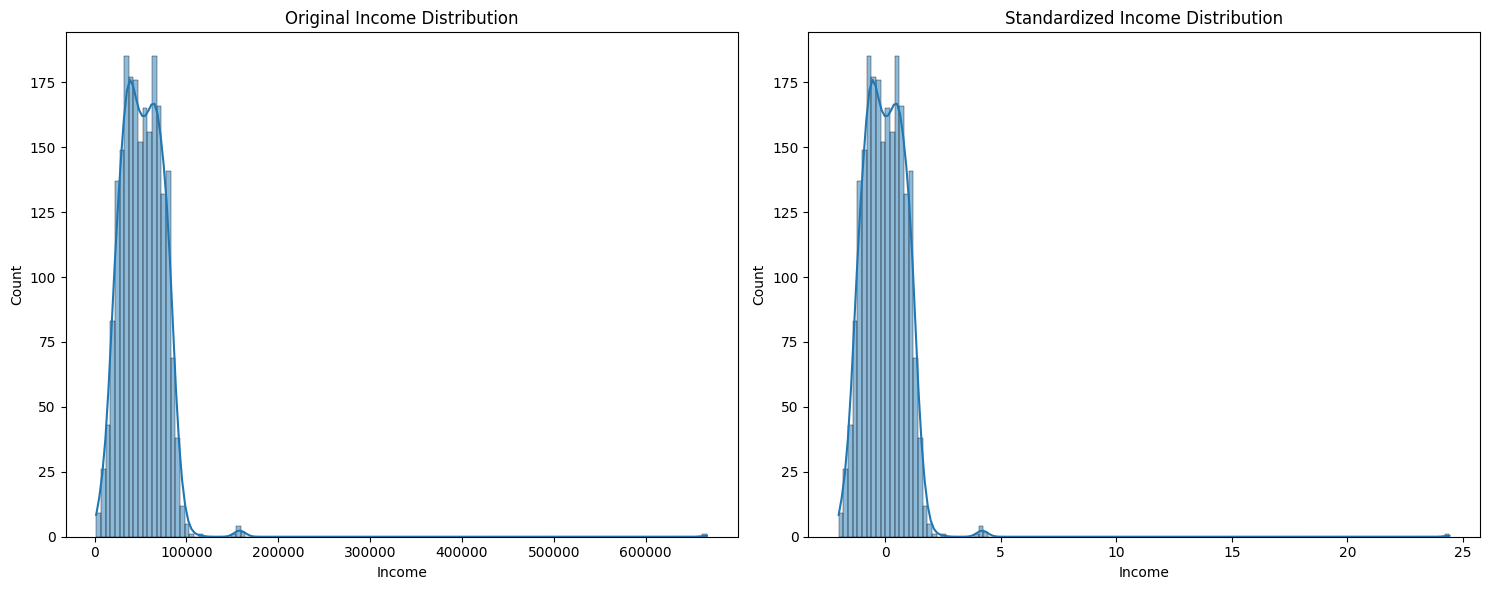

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Create a copy of the data
data_standard = data.copy()

# Apply Standardization
data_standard[continuous_cols] = standard_scaler.fit_transform(data_standard[continuous_cols])

# Display the scaled data
print("\nStandardized Data (first 5 rows):")
print(data_standard[continuous_cols].head())

# Visualize before and after scaling
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Income'], kde=True)
plt.title('Original Income Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data_standard['Income'], kde=True)
plt.title('Standardized Income Distribution')
plt.tight_layout()
plt.show()

Convert categorical variables to numerical representations using techniques like one-hot encoding or label encoding.

In [ ]:
#code here

Group the data by categorical variables (e.g., Marital_Status) and calculate summary statistics for each group.


In [ ]:
#code here

Explore the distribution of Year_Birth, Education, and Marital_Status.


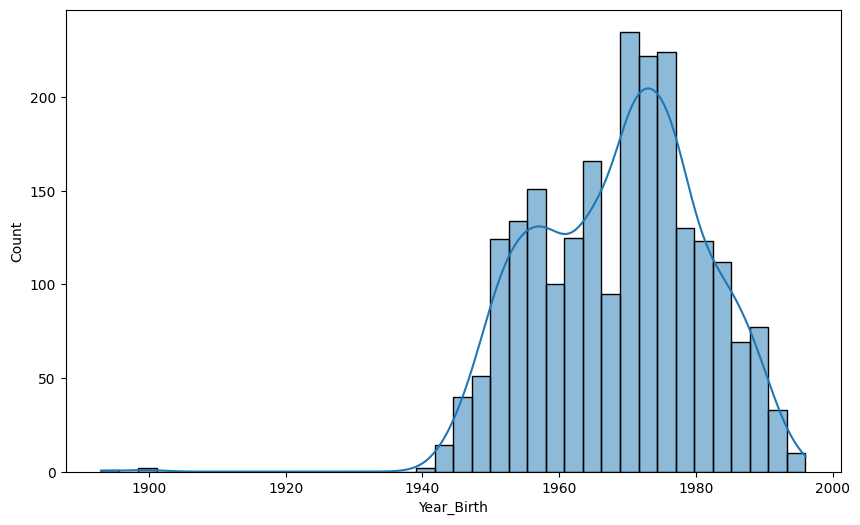

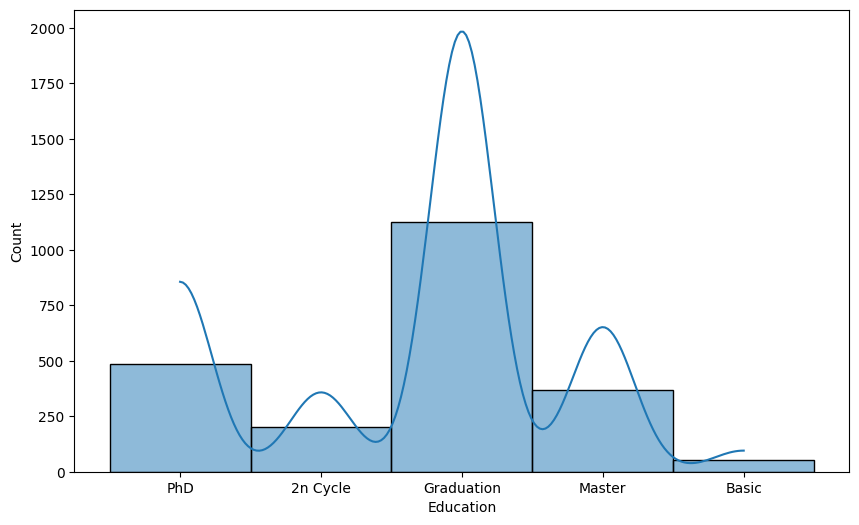

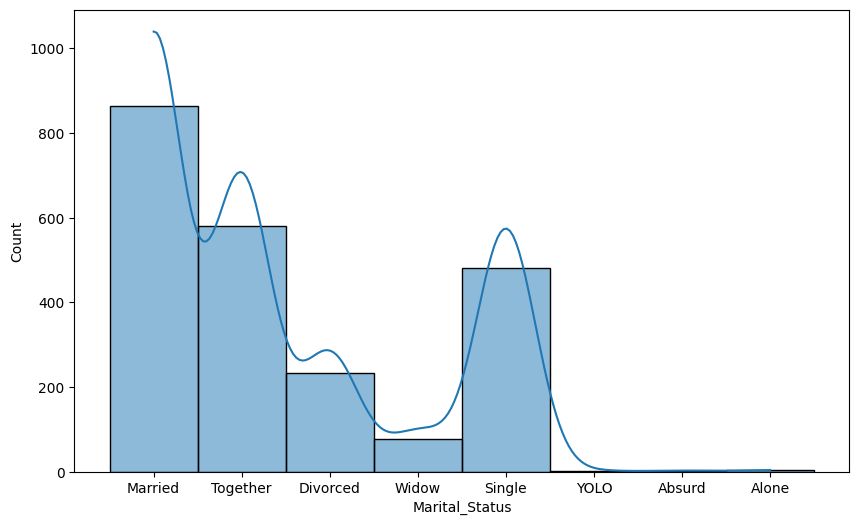

In [ ]:
col_3=['Year_Birth','Education','Marital_Status']
for col in col_3:
   plt.figure(figsize=(10,6))
   sns.histplot(data=data[col],kde=True)

Analyze the relationship between demographics and purchase behavior.


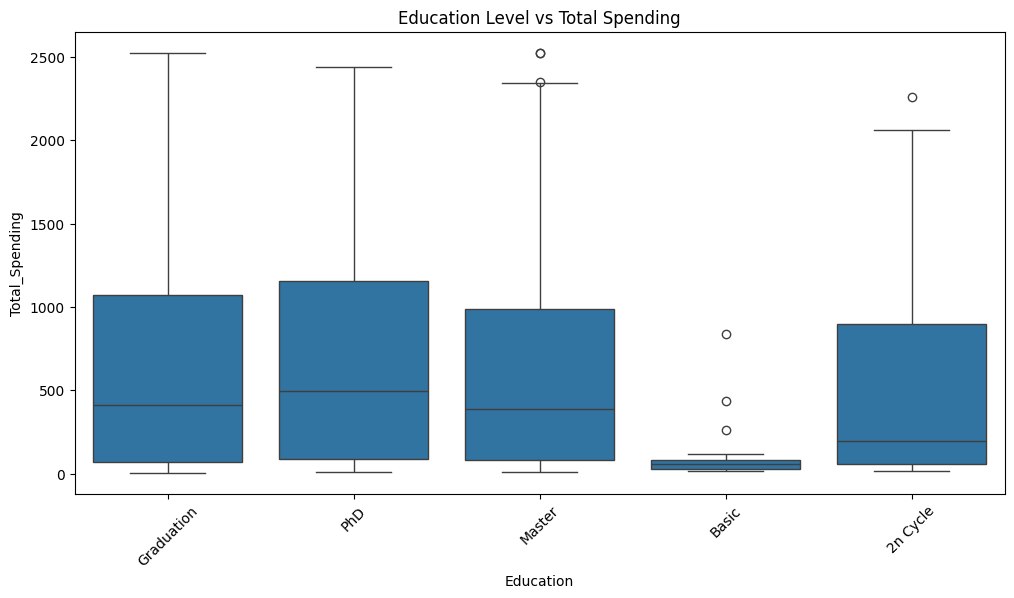

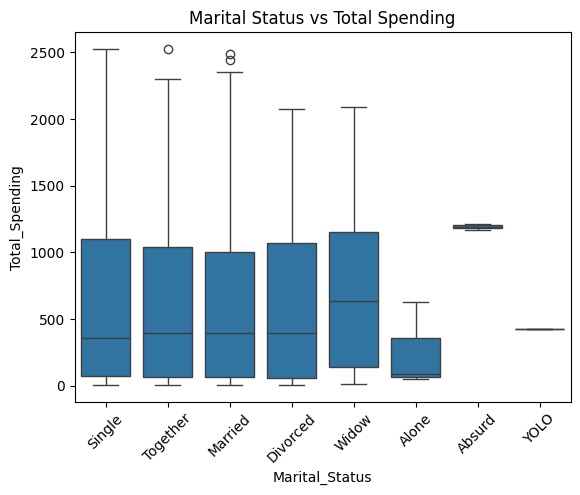

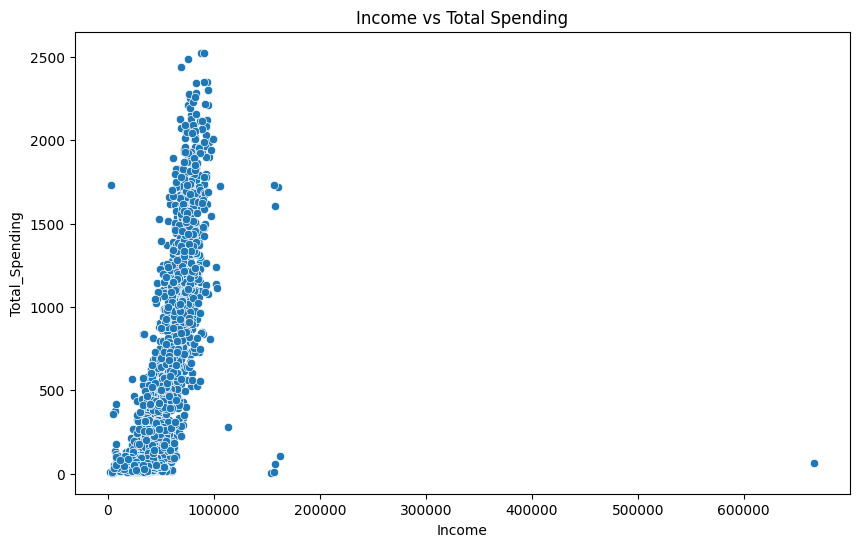

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('marketing_campaign.csv', sep='\t')

# Demographics vs Total Spending
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='Total_Spending', data=data)
plt.title('Education Level vs Total Spending')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='Marital_Status', y='Total_Spending', data=data)
plt.title('Marital Status vs Total Spending')
plt.xticks(rotation=45)
plt.show()

# Income correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Spending', data=data)
plt.title('Income vs Total Spending')
plt.show()

Compare the purchase amounts of each and every product categories in this dataset (e.g., MntWines, MntFruits).


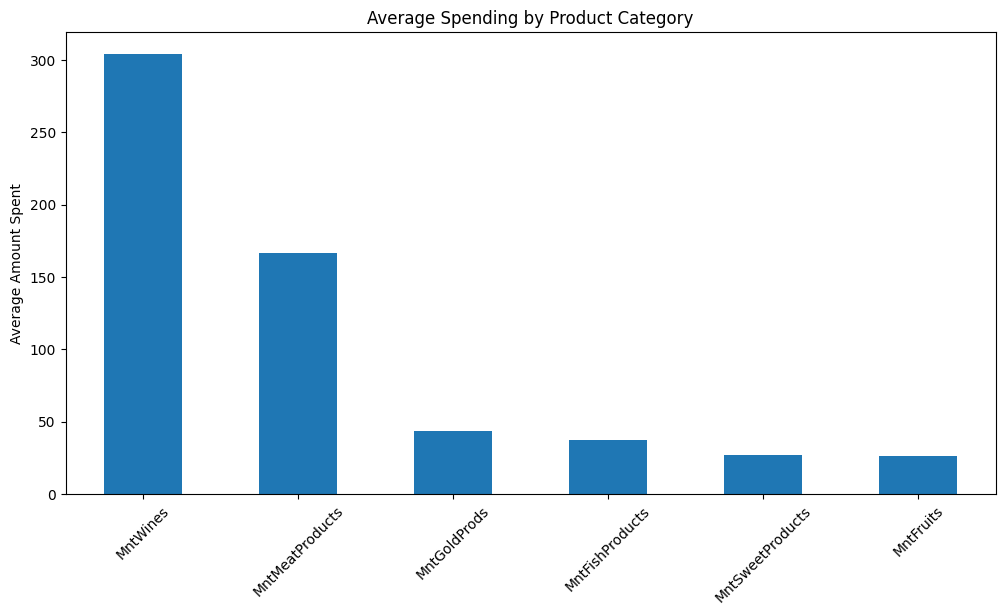

In [ ]:
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
avg_spending = data[product_categories].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_spending.plot(kind='bar')
plt.title('Average Spending by Product Category')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.show()

Analyze the relationship between purchase frequency and purchase amounts.


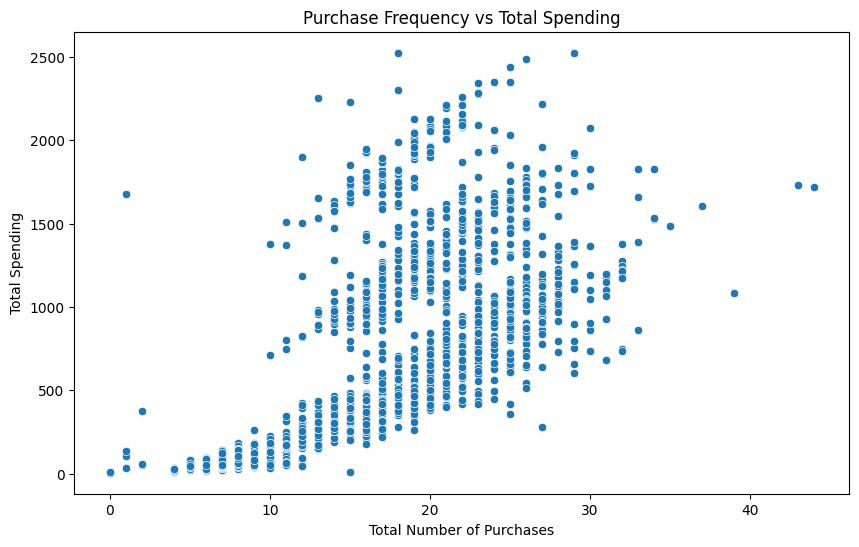

Correlation between purchase frequency and spending:
                  Total_Purchases  Total_Spending
Total_Purchases         1.000000        0.753903
Total_Spending          0.753903        1.000000


In [ ]:
data['Total_Purchases'] = data[['NumDealsPurchases', 'NumWebPurchases',
                                'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Purchases', y='Total_Spending', data=data)
plt.title('Purchase Frequency vs Total Spending')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Total Spending')
plt.show()

# Correlation
correlation = data[['Total_Purchases', 'Total_Spending']].corr()
print("Correlation between purchase frequency and spending:\n", correlation)

Analyze the acceptance rates of different campaigns in this dataset (AcceptedCmp1, AcceptedCmp2, etc.).


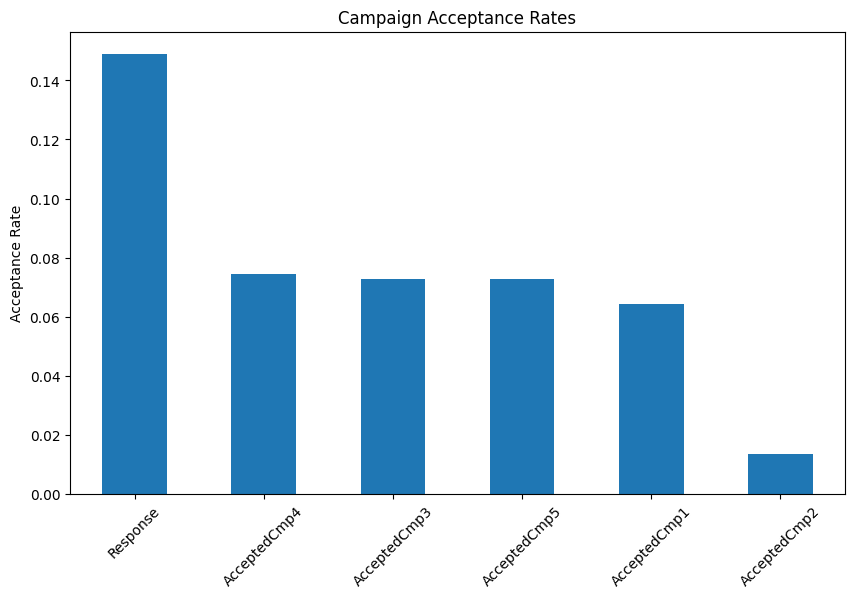

In [ ]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
acceptance_rates = data[campaigns].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
acceptance_rates.plot(kind='bar')
plt.title('Campaign Acceptance Rates')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()

Explore the relationship between campaign acceptance and customer demographics or purchase behavior.


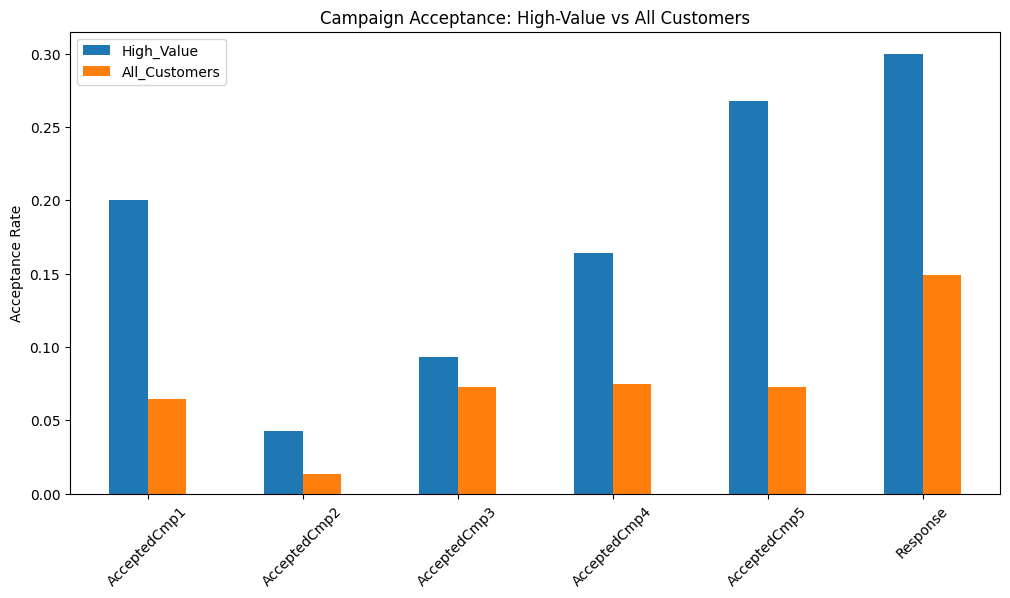

In [ ]:
# High-value customers (top 25% spending)
high_value = data[data['Total_Spending'] > data['Total_Spending'].quantile(0.75)]

# Campaign acceptance in high-value vs others
campaign_comparison = pd.DataFrame({
    'High_Value': high_value[campaigns].mean(),
    'All_Customers': data[campaigns].mean()
})

campaign_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Campaign Acceptance: High-Value vs All Customers')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()

Analyze the relationship between Recency and purchase behavior.


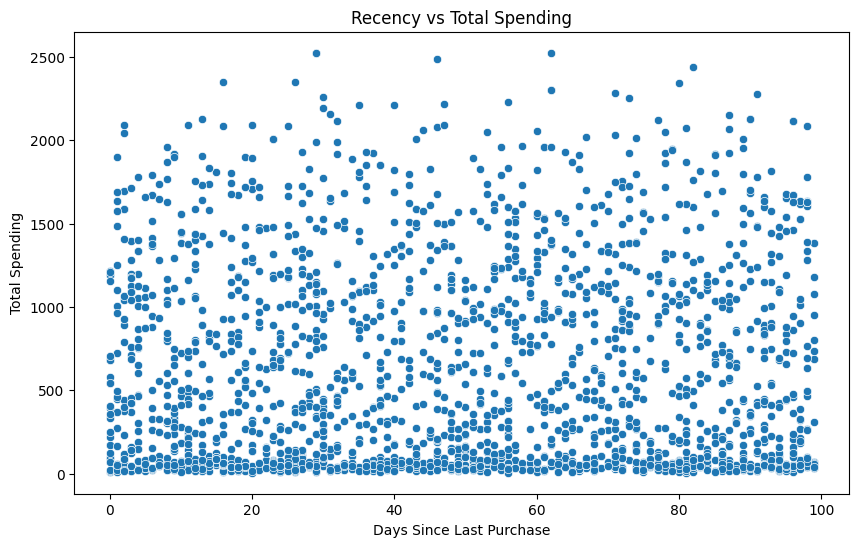

Average spending by recency segment:
 Recency_Segment
Very Recent    578.835979
Recent         599.609009
Moderate       647.915344
Dormant        596.437387
Name: Total_Spending, dtype: float64


/tmp/ipython-input-3009655279.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency_analysis = data.groupby('Recency_Segment')['Total_Spending'].mean()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Total_Spending', data=data)
plt.title('Recency vs Total Spending')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Total Spending')
plt.show()

# Recency segments
data['Recency_Segment'] = pd.qcut(data['Recency'], q=4, labels=['Very Recent', 'Recent', 'Moderate', 'Dormant'])
recency_analysis = data.groupby('Recency_Segment')['Total_Spending'].mean()
print("Average spending by recency segment:\n", recency_analysis)

Identify frequent customers and their characteristics.


In [ ]:
# Define frequent customers (top 25% purchase frequency)
frequent_customers = data[data['Total_Purchases'] > data['Total_Purchases'].quantile(0.75)]

# Characteristics
print("Frequent customers characteristics:")
print(f"Average Income: ${frequent_customers['Income'].mean():,.2f}")
print(f"Most Common Education: {frequent_customers['Education'].mode()[0]}")
print(f"Most Common Marital Status: {frequent_customers['Marital_Status'].mode()[0]}")
print(f"Average Kids at Home: {frequent_customers['Kidhome'].mean():.2f}")
print(f"Average Teens at Home: {frequent_customers['Teenhome'].mean():.2f}")

Frequent customers characteristics:
Average Income: $68,209.76
Most Common Education: Graduation
Most Common Marital Status: Married
Average Kids at Home: 0.17
Average Teens at Home: 0.61


Analyze the relationship between Complain and customer satisfaction or purchase behavior.


Complaint impact on spending:
                 mean  count
Complain                   
0         607.968905   2219
1         376.428571     21


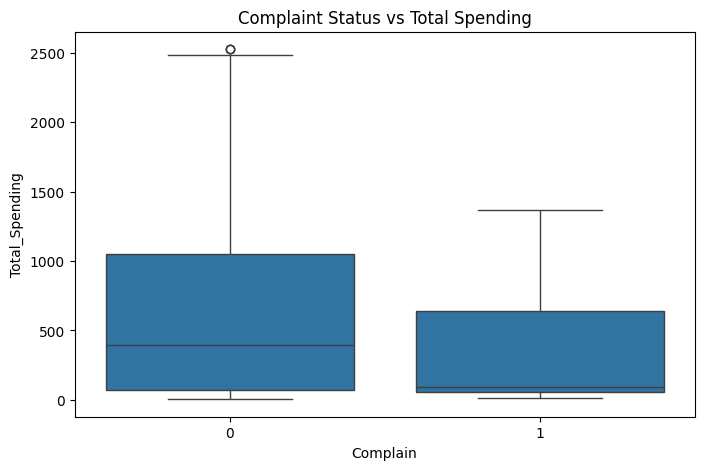

In [ ]:
complaint_analysis = data.groupby('Complain')['Total_Spending'].agg(['mean', 'count'])
print("Complaint impact on spending:\n", complaint_analysis)

# Visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x='Complain', y='Total_Spending', data=data)
plt.title('Complaint Status vs Total Spending')
plt.show()

Analyze the relationship between Z_Revenue and Z_CostContact.

In [ ]:
print("Z_Revenue and Z_CostContact values:")
print(data[['Z_Revenue', 'Z_CostContact']].describe())

# Correlation
correlation_z = data[['Z_Revenue', 'Z_CostContact']].corr()
print("\nCorrelation between Z_Revenue and Z_CostContact:\n", correlation_z)

Z_Revenue and Z_CostContact values:
       Z_Revenue  Z_CostContact
count     2240.0         2240.0
mean        11.0            3.0
std          0.0            0.0
min         11.0            3.0
25%         11.0            3.0
50%         11.0            3.0
75%         11.0            3.0
max         11.0            3.0

Correlation between Z_Revenue and Z_CostContact:
                Z_Revenue  Z_CostContact
Z_Revenue            NaN            NaN
Z_CostContact        NaN            NaN


Use clustering techniques ( K-means, hierarchical clustering) to identify distinct customer segments based on their characteristics and purchase behavior.


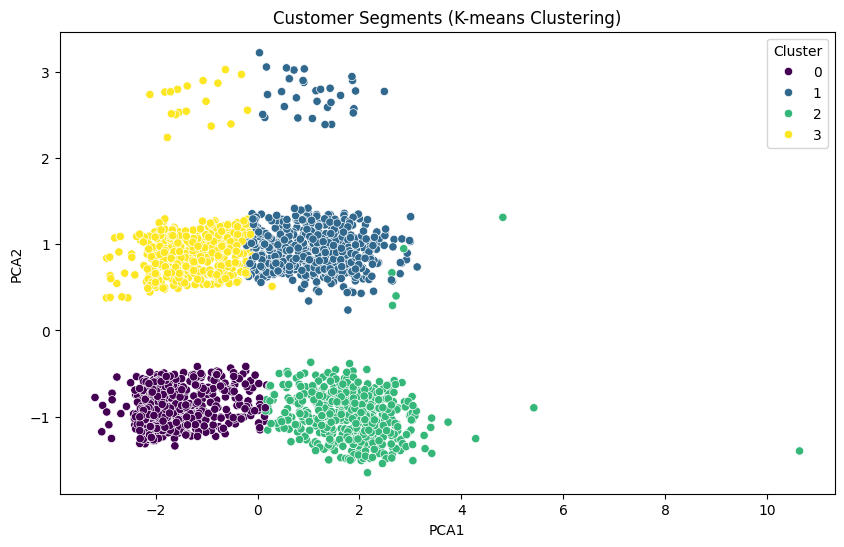

Cluster characteristics:
                Income   Kidhome  Teenhome    Recency  Total_Spending  \
Cluster                                                                
0        30441.276423  0.801626  0.000000  48.912195      121.876423   
1        61220.034188  0.105983  1.056410  48.415385      825.724786   
2        76894.881041  0.070632  0.011152  49.200743     1360.866171   
3        41580.246862  0.807531  1.037657  49.661088      115.334728   

         Total_Purchases      PCA1      PCA2  
Cluster                                       
0               8.302439 -1.613115 -0.879496  
1              21.523077  1.107561  1.037497  
2              20.405204  1.830201 -0.964013  
3               8.997908 -1.339970  0.946848  


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Prepare data for clustering
cluster_data = data[['Income', 'Kidhome', 'Teenhome', 'Recency',
                    'Total_Spending', 'Total_Purchases']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
cluster_data['Cluster'] = clusters

# PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
cluster_data['PCA1'] = pca_result[:, 0]
cluster_data['PCA2'] = pca_result[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=cluster_data, palette='viridis')
plt.title('Customer Segments (K-means Clustering)')
plt.show()

# Cluster characteristics
cluster_summary = cluster_data.groupby('Cluster').mean()
print("Cluster characteristics:\n", cluster_summary)

Use scatter plots or other visualization techniques to visualize the identified customer segments.


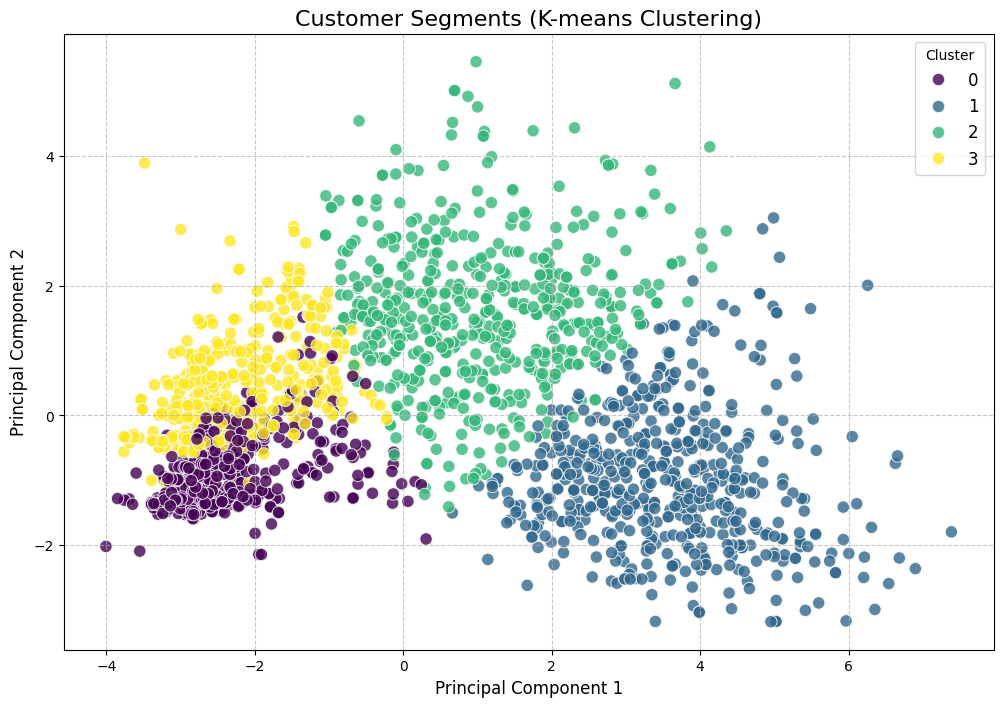

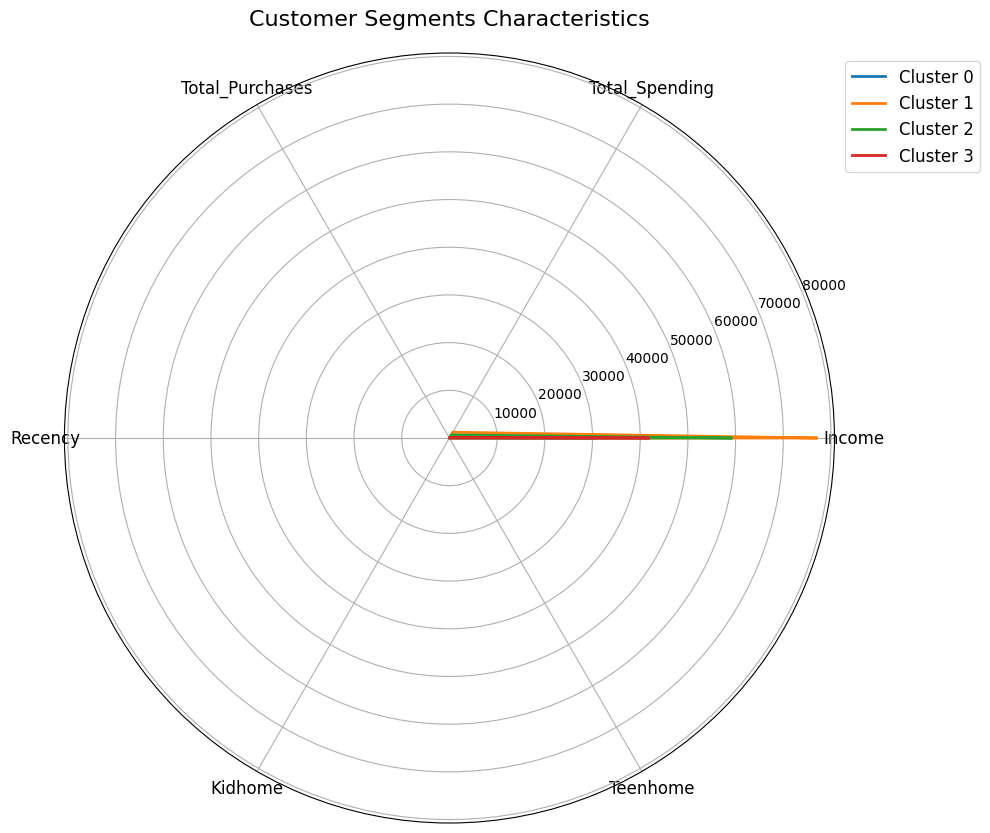

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load data
data = pd.read_csv('marketing_campaign.csv', sep='\t')

# Prepare data for clustering
cluster_data = data[['Income', 'Kidhome', 'Teenhome', 'Recency',
                    'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases']].dropna()

# Calculate total spending and total purchases
cluster_data['Total_Spending'] = cluster_data[['MntWines', 'MntFruits', 'MntMeatProducts',
                                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
cluster_data['Total_Purchases'] = cluster_data[['NumDealsPurchases', 'NumWebPurchases',
                                              'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
cluster_data['Cluster'] = clusters

# PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
cluster_data['PCA1'] = pca_result[:, 0]
cluster_data['PCA2'] = pca_result[:, 1]

# Visualize clusters with scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=cluster_data, palette='viridis', s=80, alpha=0.8)
plt.title('Customer Segments (K-means Clustering)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Radar chart for cluster characteristics
cluster_summary = cluster_data.groupby('Cluster').mean()
categories = ['Income', 'Total_Spending', 'Total_Purchases', 'Recency', 'Kidhome', 'Teenhome']
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the loop

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, polar=True)

for i, cluster in enumerate(cluster_summary.index):
    values = cluster_summary.loc[cluster, categories].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories, fontsize=12)
plt.yticks(fontsize=10)
plt.title('Customer Segments Characteristics', fontsize=16, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), fontsize=12)
plt.grid(True)
plt.show()

Calculate customer lifetime value (CLTV) based on purchase history and customer demographics.


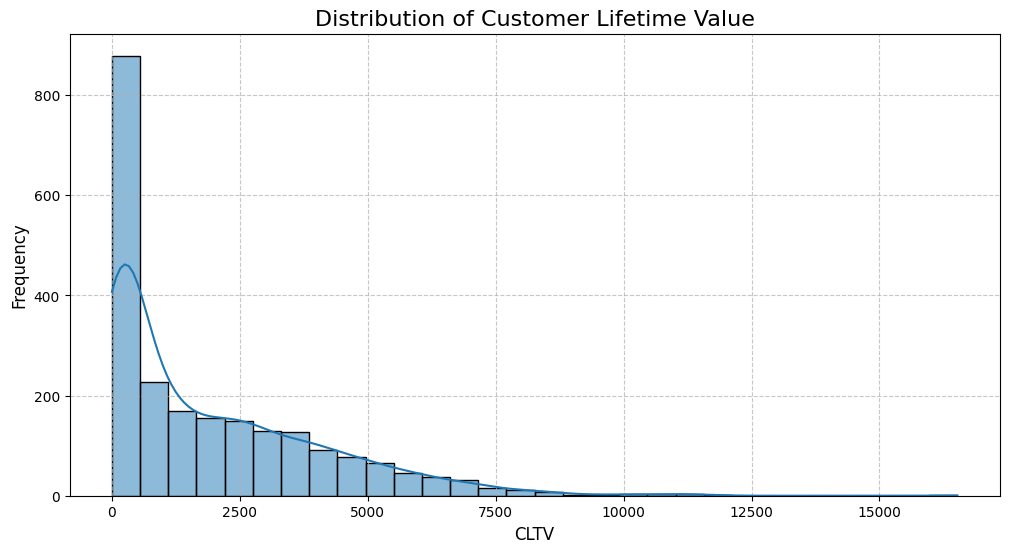

Top 10 customers by CLTV:
        ID          CLTV  Total_Spending  Total_Purchases   Income  \
339   1150  16522.583333            1853               15  83532.0   
1052  4475  11590.000000            2440               25  69098.0   
424   6932  11477.916667            2119               22  93027.0   
1444  1553  11415.000000            2283               23  82657.0   
644   1173  11072.333333            2252               13  77632.0   
1982  3334  11055.000000            2211               21  94642.0   
1992  6248  10900.250000            2217               27  91712.0   
519   3711  10720.363636            1902               20  80184.0   
1749   737  10597.250000            2231               15  80360.0   
943   5386  10167.166667            2302               18  94384.0   

       Education Marital_Status  
339          PhD       Together  
1052         PhD        Married  
424          PhD        Married  
1444  Graduation       Together  
644       Master       Together  

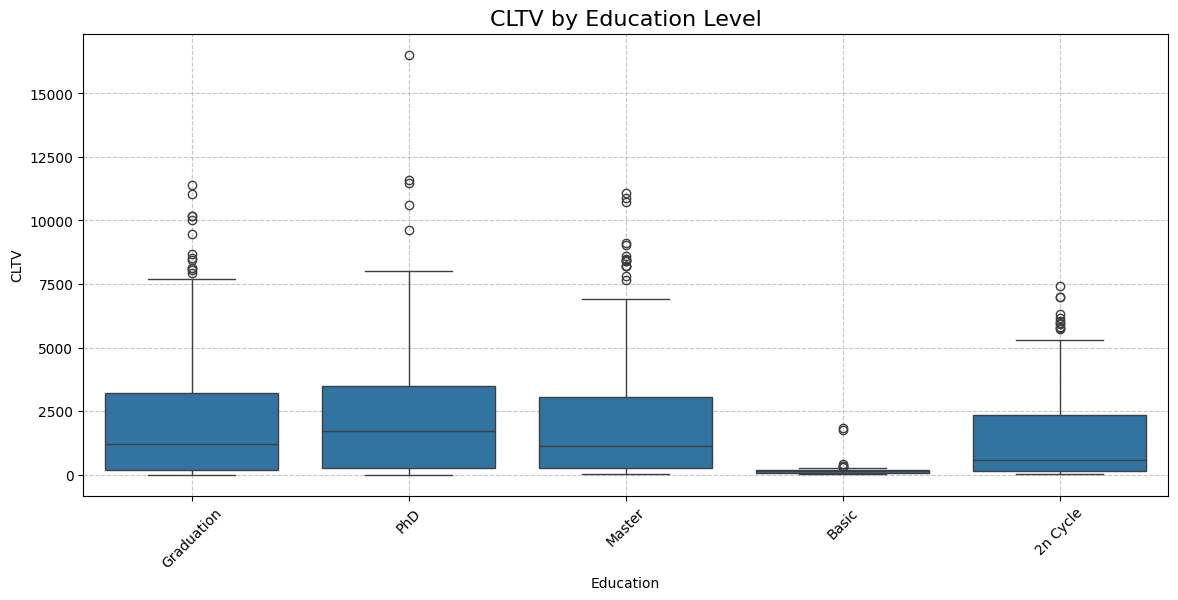

In [ ]:
# Calculate customer lifetime value
data['Customer_Age'] = 2024 - data['Year_Birth']  # Assuming current year is 2024
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
data['Total_Purchases'] = data[['NumDealsPurchases', 'NumWebPurchases',
                                'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Simple CLTV calculation: (Average Transaction Value × Purchase Frequency × Customer Lifespan)
data['Avg_Transaction_Value'] = data['Total_Spending'] / data['Total_Purchases']
data['Purchase_Frequency'] = data['Total_Purchases'] / ((2024 - pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y').dt.year) + 1)
data['Customer_Lifespan'] = data['Customer_Age'] - 18  # Assuming adult customers start at 18

# Calculate CLTV
data['CLTV'] = data['Avg_Transaction_Value'] * data['Purchase_Frequency'] * data['Customer_Lifespan']

# Handle any infinite or NaN values
data['CLTV'] = data['CLTV'].replace([np.inf, -np.inf], np.nan)
data['CLTV'] = data['CLTV'].fillna(0)

# Visualize CLTV distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['CLTV'], kde=True, bins=30)
plt.title('Distribution of Customer Lifetime Value', fontsize=16)
plt.xlabel('CLTV', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Top customers by CLTV
top_cltv = data.nlargest(10, 'CLTV')[['ID', 'CLTV', 'Total_Spending', 'Total_Purchases', 'Income', 'Education', 'Marital_Status']]
print("Top 10 customers by CLTV:")
print(top_cltv)

# CLTV by demographics
plt.figure(figsize=(14, 6))
sns.boxplot(x='Education', y='CLTV', data=data)
plt.title('CLTV by Education Level', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Consider creating new features based on existing variables (e.g., calculate the total purchase amount or average purchase frequency).

In [ ]:
# Calculate total purchase amount
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate total purchase frequency
data['Total_Purchases'] = data[['NumDealsPurchases', 'NumWebPurchases',
                                'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Average purchase value
data['Avg_Purchase_Value'] = data['Total_Spending'] / data['Total_Purchases']
data['Avg_Purchase_Value'] = data['Avg_Purchase_Value'].fillna(0)  # Handle division by zero

# Family size
data['Family_Size'] = 1 + data['Kidhome'] + data['Teenhome']  # Assuming 1 adult

# Income per family member
data['Income_Per_Member'] = data['Income'] / data['Family_Size']

# Spending per family member
data['Spending_Per_Member'] = data['Total_Spending'] / data['Family_Size']

# Ratio of deals purchases to total purchases
data['Deals_Ratio'] = data['NumDealsPurchases'] / data['Total_Purchases']
data['Deals_Ratio'] = data['Deals_Ratio'].fillna(0)  # Handle division by zero

# Web vs store purchase ratio
data['Web_Store_Ratio'] = data['NumWebPurchases'] / (data['NumStorePurchases'] + 1)  # Add 1 to avoid division by zero

# Total accepted campaigns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data['Total_Accepted_Campaigns'] = data[campaign_cols].sum(axis=1)

# Customer age
data['Customer_Age'] = 2024 - data['Year_Birth']  # Assuming current year is 2024

# Years as customer
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['Years_As_Customer'] = 2024 - data['Dt_Customer'].dt.year

# Display the new features
new_features = ['Total_Spending', 'Total_Purchases', 'Avg_Purchase_Value', 'Family_Size',
                'Income_Per_Member', 'Spending_Per_Member', 'Deals_Ratio',
                'Web_Store_Ratio', 'Total_Accepted_Campaigns', 'Customer_Age', 'Years_As_Customer']
print("Sample of new features:")
print(data[new_features].head())

Sample of new features:
   Total_Spending  Total_Purchases  Avg_Purchase_Value  Family_Size  \
0            1617               25           64.680000            1   
1              27                6            4.500000            3   
2             776               21           36.952381            1   
3              53                8            6.625000            2   
4             422               19           22.210526            2   

   Income_Per_Member  Spending_Per_Member  Deals_Ratio  Web_Store_Ratio  \
0            58138.0               1617.0     0.120000         1.600000   
1            15448.0                  9.0     0.333333         0.333333   
2            71613.0                776.0     0.047619         0.727273   
3            13323.0                 26.5     0.250000         0.400000   
4            29146.5                211.0     0.263158         0.714286   

   Total_Accepted_Campaigns  Customer_Age  Years_As_Customer  
0                         0        

Extract relevant date-based features (e.g., day of week, month, year) from Dt_Customer.


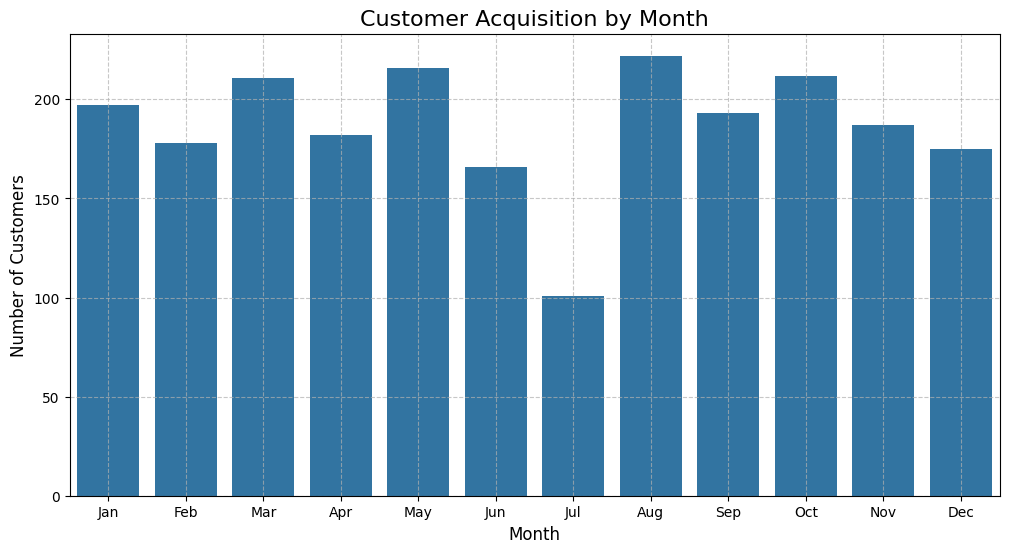

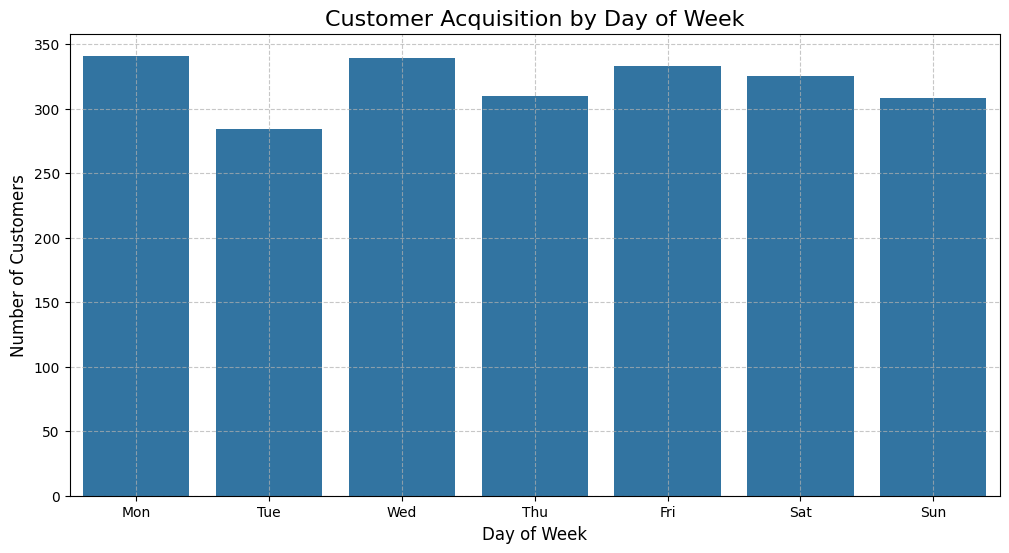

Sample of date-based features:
  Dt_Customer  Customer_Month  Customer_Year  Customer_Day  \
0  2012-09-04               9           2012             4   
1  2014-03-08               3           2014             8   
2  2013-08-21               8           2013            21   
3  2014-02-10               2           2014            10   
4  2014-01-19               1           2014            19   

   Customer_DayOfWeek  Customer_DayOfYear  Customer_Quarter  \
0                   1                 248                 3   
1                   5                  67                 1   
2                   2                 233                 3   
3                   0                  41                 1   
4                   6                  19                 1   

   Customer_WeekOfYear Customer_Month_Name Customer_DayOfWeek_Name  \
0                   36                 Sep                     Tue   
1                   10                 Mar                     Sat   
2      

In [ ]:
# Convert Dt_Customer to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Extract date-based features
data['Customer_Month'] = data['Dt_Customer'].dt.month
data['Customer_Year'] = data['Dt_Customer'].dt.year
data['Customer_Day'] = data['Dt_Customer'].dt.day
data['Customer_DayOfWeek'] = data['Dt_Customer'].dt.dayofweek  # Monday=0, Sunday=6
data['Customer_DayOfYear'] = data['Dt_Customer'].dt.dayofyear
data['Customer_Quarter'] = data['Dt_Customer'].dt.quarter
data['Customer_WeekOfYear'] = data['Dt_Customer'].dt.isocalendar().week

# Create categorical features for month and day of week
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
data['Customer_Month_Name'] = data['Customer_Month'].map(month_names)

day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
data['Customer_DayOfWeek_Name'] = data['Customer_DayOfWeek'].map(day_names)

# Calculate years as customer
data['Years_As_Customer'] = 2024 - data['Customer_Year']  # Assuming current year is 2024

# Visualize customer acquisition by month
plt.figure(figsize=(12, 6))
sns.countplot(x='Customer_Month_Name', data=data, order=month_names.values())
plt.title('Customer Acquisition by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualize customer acquisition by day of week
plt.figure(figsize=(12, 6))
sns.countplot(x='Customer_DayOfWeek_Name', data=data, order=day_names.values())
plt.title('Customer Acquisition by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Display date-based features
date_features = ['Dt_Customer', 'Customer_Month', 'Customer_Year', 'Customer_Day',
                 'Customer_DayOfWeek', 'Customer_DayOfYear', 'Customer_Quarter',
                 'Customer_WeekOfYear', 'Customer_Month_Name', 'Customer_DayOfWeek_Name', 'Years_As_Customer']
print("Sample of date-based features:")
print(data[date_features].head())

Combine existing features to capture interactions (e.g., Income * NumDealsPurchases).


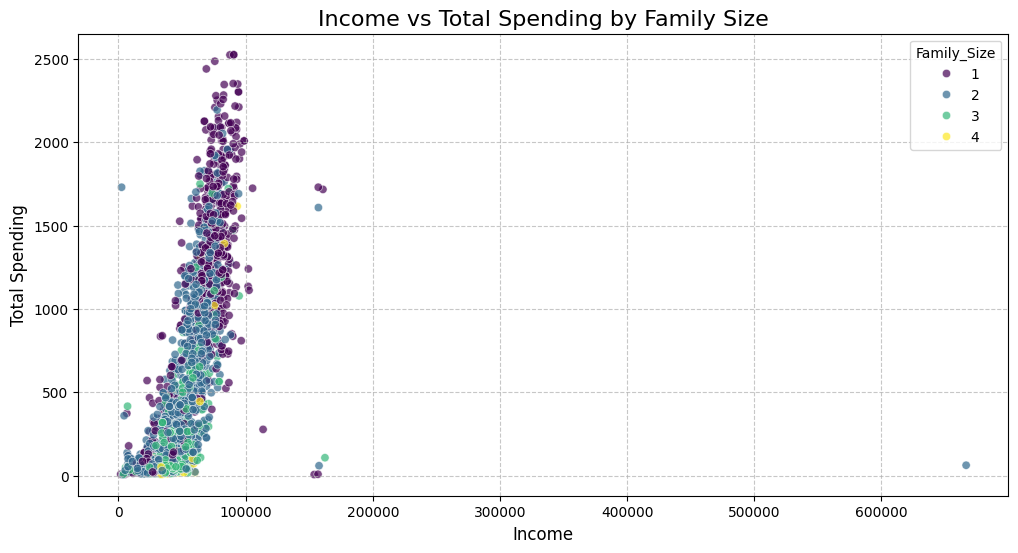

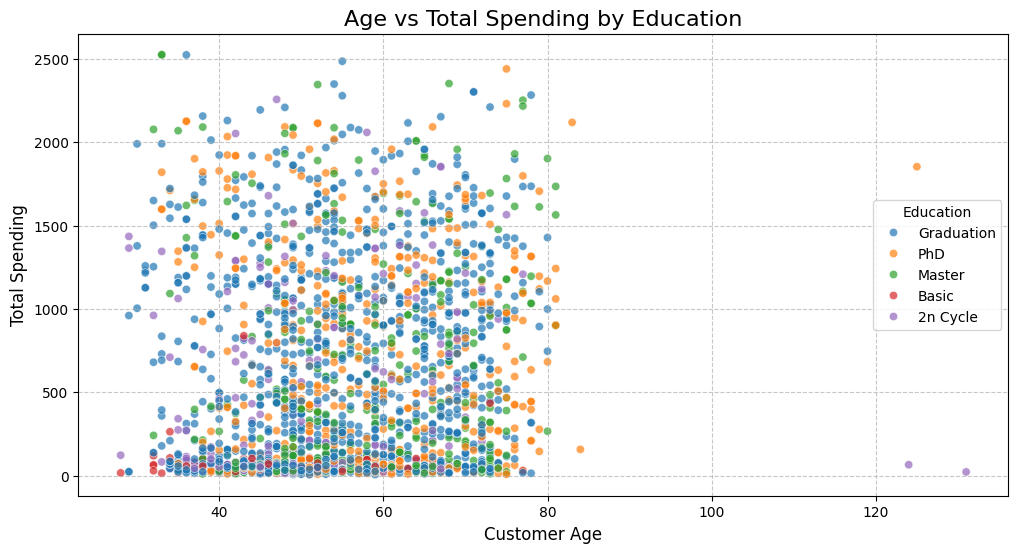

Sample of interaction features:
   Income_Frequency_Interaction  Income_Spending_Interaction  \
0                     1453450.0                   94009146.0   
1                      278064.0                    1251288.0   
2                     1503873.0                   55571688.0   
3                      213168.0                    1412238.0   
4                     1107567.0                   24599646.0   

   Income_FamilySize_Interaction  Spending_Per_Child  Web_Engagement  \
0                        58138.0              1617.0              56   
1                       139032.0                 9.0               5   
2                        71613.0               776.0              32   
3                        53292.0                26.5              12   
4                       116586.0               211.0              25   

   Deal_Sensitivity  Campaign_Acceptance_Rate  Recency_Spending_Interaction  \
0          0.002064                       0.0                         9

In [ ]:
# Income * Purchase frequency interaction
data['Income_Frequency_Interaction'] = data['Income'] * data['Total_Purchases']

# Income * Total spending interaction
data['Income_Spending_Interaction'] = data['Income'] * data['Total_Spending']

# Income * Family size interaction
data['Income_FamilySize_Interaction'] = data['Income'] * data['Family_Size']

# Spending per child
data['Spending_Per_Child'] = data['Total_Spending'] / (data['Kidhome'] + data['Teenhome'] + 1)

# Web engagement score
data['Web_Engagement'] = data['NumWebPurchases'] * data['NumWebVisitsMonth']

# Deal sensitivity by income
data['Deal_Sensitivity'] = data['Deals_Ratio'] / (data['Income'] / 1000)  # Income in thousands

# Campaign acceptance rate
data['Campaign_Acceptance_Rate'] = data['Total_Accepted_Campaigns'] / 5  # 5 campaigns total

# Recency * Spending interaction
data['Recency_Spending_Interaction'] = data['Recency'] * data['Total_Spending']

# Age * Income interaction
data['Age_Income_Interaction'] = data['Customer_Age'] * data['Income']

# Visualize some interactions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Income', y='Total_Spending', hue='Family_Size', data=data, palette='viridis', alpha=0.7)
plt.title('Income vs Total Spending by Family Size', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Customer_Age', y='Total_Spending', hue='Education', data=data, alpha=0.7)
plt.title('Age vs Total Spending by Education', fontsize=16)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Display interaction features
interaction_features = ['Income_Frequency_Interaction', 'Income_Spending_Interaction',
                      'Income_FamilySize_Interaction', 'Spending_Per_Child',
                      'Web_Engagement', 'Deal_Sensitivity', 'Campaign_Acceptance_Rate',
                      'Recency_Spending_Interaction', 'Age_Income_Interaction']
print("Sample of interaction features:")
print(data[interaction_features].head())

If numerical variables have skewed distributions, apply transformations like log transformations or square root transformations.


/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


Skewness of numerical variables:
Deal_Sensitivity                 28.037290
Web_Store_Ratio                  21.582312
Complain                         10.188972
AcceptedCmp2                      8.472093
Income                            6.763487
Income_FamilySize_Interaction     6.581473
AcceptedCmp1                      3.555444
AcceptedCmp5                      3.291705
AcceptedCmp3                      3.291705
AcceptedCmp4                      3.241574
Age_Income_Interaction            3.168688
Campaign_Acceptance_Rate          2.722633
Total_Accepted_Campaigns          2.722633
NumDealsPurchases                 2.418569
MntSweetProducts                  2.136081
MntFruits                         2.102063
MntMeatProducts                   2.083233
Response                          1.971555
MntFishProducts                   1.919769
MntGoldProds                      1.886106
NumCatalogPurchases               1.880989
Income_Per_Member                 1.785656
Recency_Spending_Inte

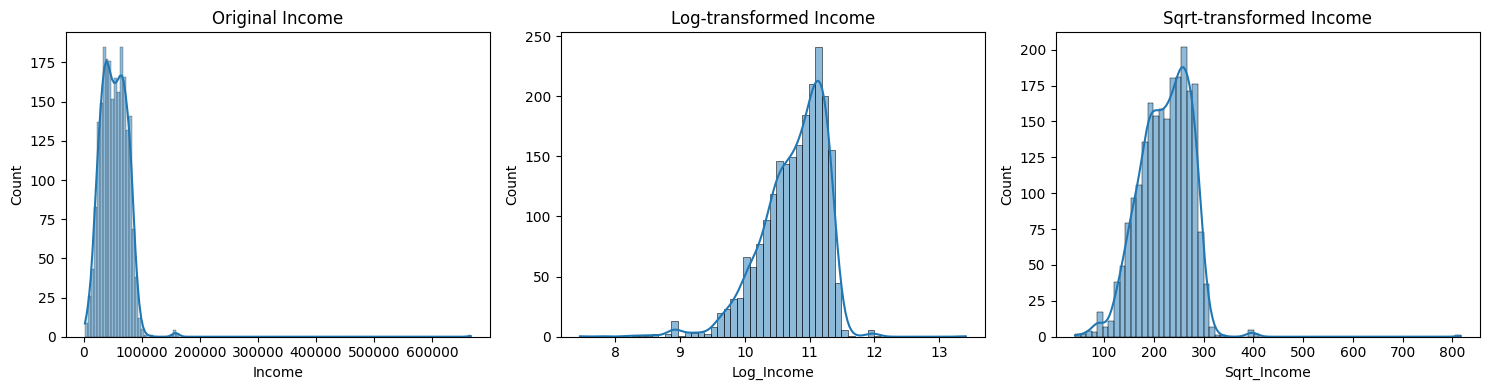

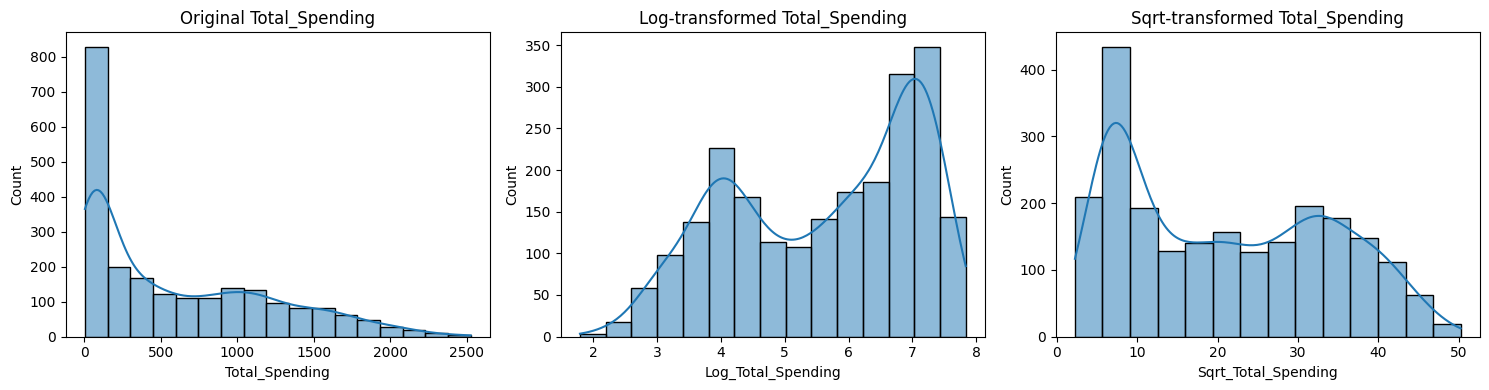

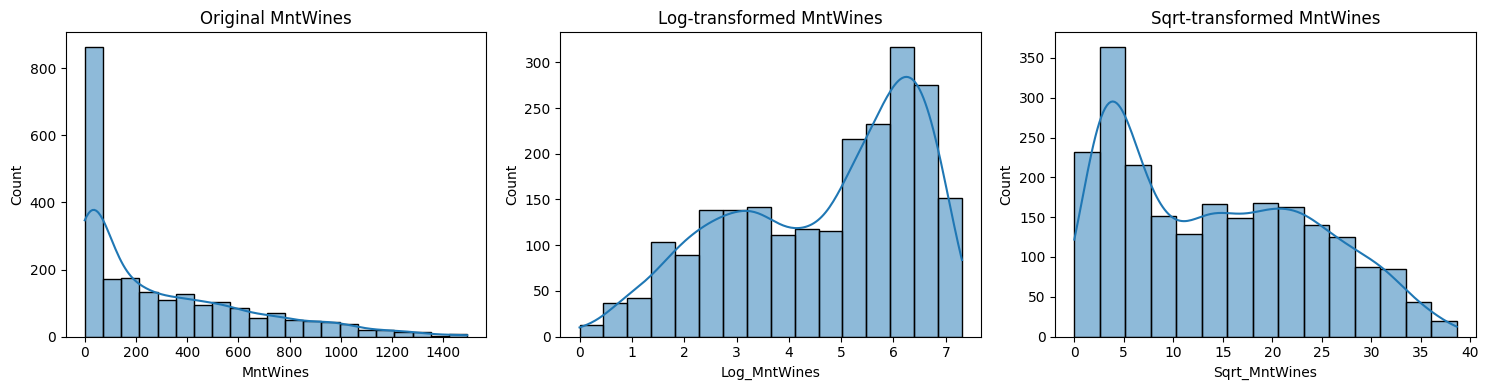

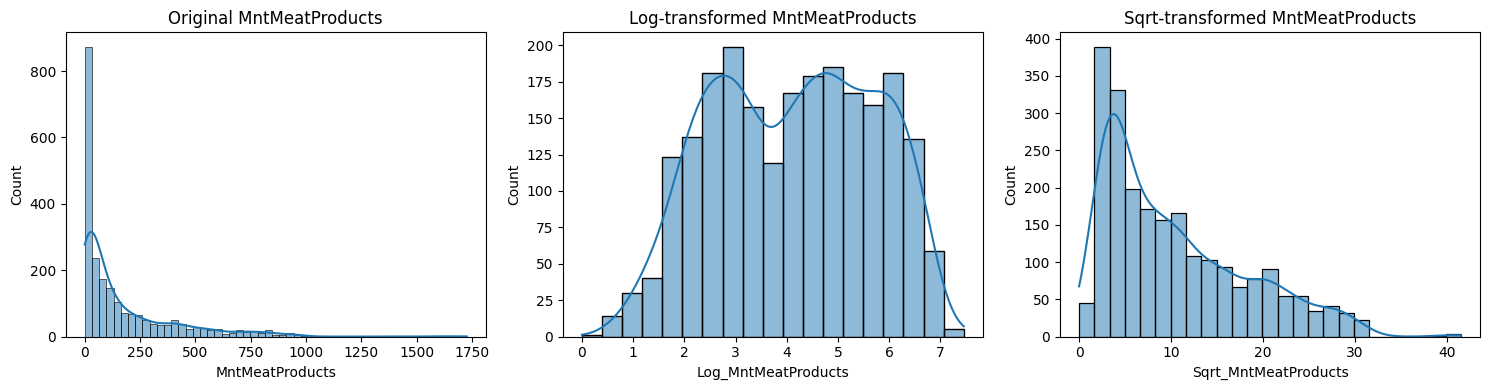


Skewness comparison:
                           Original  Log_Transformed  Sqrt_Transformed
AcceptedCmp1               3.555444              NaN               NaN
AcceptedCmp2               8.472093              NaN               NaN
AcceptedCmp3               3.291705              NaN               NaN
AcceptedCmp4               3.241574              NaN               NaN
AcceptedCmp5               3.291705              NaN               NaN
...                             ...              ...               ...
Sqrt_Web_Store_Ratio            NaN              NaN          5.123971
Total_Accepted_Campaigns   2.722633              NaN               NaN
Total_Spending             0.860841              NaN               NaN
Web_Engagement             1.402584              NaN               NaN
Web_Store_Ratio           21.582312              NaN               NaN

[92 rows x 3 columns]


In [ ]:
from scipy import stats

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Check skewness of numerical variables
skewness = data[numerical_cols].skew().sort_values(ascending=False)
print("Skewness of numerical variables:")
print(skewness)

# Select highly skewed variables (absolute skewness > 0.75)
highly_skewed = skewness[abs(skewness) > 0.75].index.tolist()
print("\nHighly skewed variables (|skewness| > 0.75):")
print(highly_skewed)

# Apply transformations to highly skewed variables
for col in highly_skewed:
    if col in ['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Response', 'Complain']:
        continue  # Skip ID and binary/categorical variables

    # Log transformation (add 1 to handle zeros)
    data[f'Log_{col}'] = np.log1p(data[col])

    # Square root transformation
    data[f'Sqrt_{col}'] = np.sqrt(data[col])

    # Box-Cox transformation (only for positive values)
    if (data[col] > 0).all():
        data[f'BoxCox_{col}'], _ = stats.boxcox(data[col])

# Visualize transformation results for a few key variables
key_vars = ['Income', 'Total_Spending', 'MntWines', 'MntMeatProducts']

for var in key_vars:
    plt.figure(figsize=(15, 4))

    # Original distribution
    plt.subplot(1, 3, 1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Original {var}')

    # Log transformation
    plt.subplot(1, 3, 2)
    sns.histplot(data[f'Log_{var}'], kde=True)
    plt.title(f'Log-transformed {var}')

    # Square root transformation
    plt.subplot(1, 3, 3)
    sns.histplot(data[f'Sqrt_{var}'], kde=True)
    plt.title(f'Sqrt-transformed {var}')

    plt.tight_layout()
    plt.show()

# Compare skewness before and after transformation
print("\nSkewness comparison:")
comparison = pd.DataFrame({
    'Original': data[highly_skewed].skew(),
    'Log_Transformed': data[[f'Log_{col}' for col in highly_skewed if f'Log_{col}' in data.columns]].skew(),
    'Sqrt_Transformed': data[[f'Sqrt_{col}' for col in highly_skewed if f'Sqrt_{col}' in data.columns]].skew()
})
print(comparison)

If the target variable (Response) is imbalanced, use techniques like oversampling, undersampling, or class weighting to address the imbalance.

Target variable distribution:
Response
0    1906
1     334
Name: count, dtype: int64

Target variable percentage:
Response
0    85.089286
1    14.910714
Name: proportion, dtype: float64


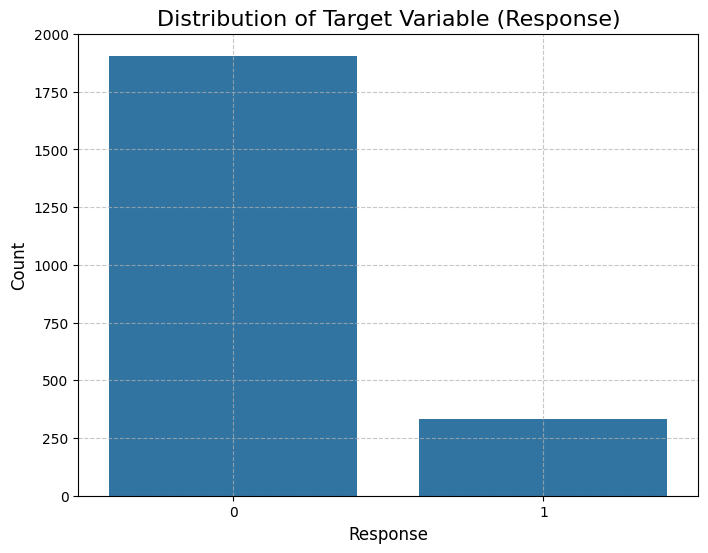


After SMOTE:
Response
0    1314
1    1314
Name: count, dtype: int64

After Random Under-sampling:
Response
0    237
1    237
Name: count, dtype: int64

After SMOTEENN:
Response
1    877
0    691
Name: count, dtype: int64

Class weights: {np.int64(0): np.float64(0.5901826484018264), np.int64(1): np.float64(3.2721518987341773)}

Original Model Performance:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       569
           1       0.66      0.26      0.37        96

    accuracy                           0.87       665
   macro avg       0.77      0.62      0.65       665
weighted avg       0.85      0.87      0.85       665


SMOTE Model Performance:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       569
           1       0.49      0.59      0.54        96

    accuracy                           0.85       665
   macro avg       0.71      0.75      0.73       665
weighted avg     

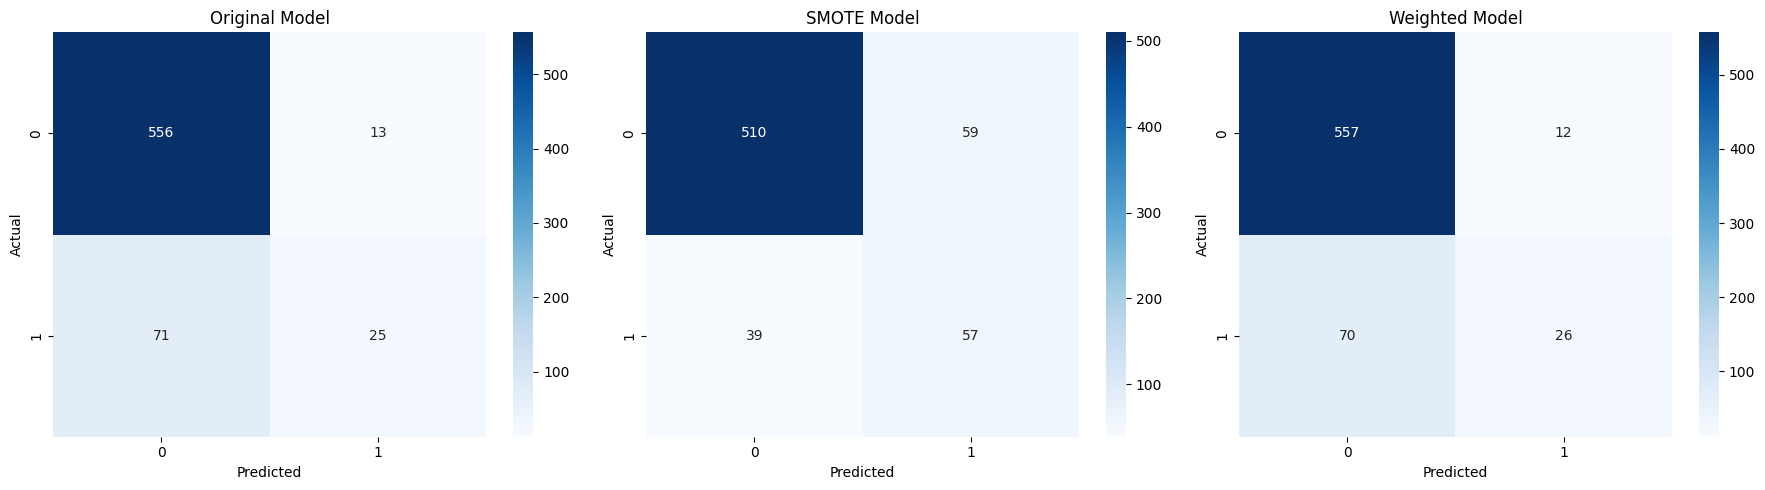

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Check target variable distribution
target_counts = data['Response'].value_counts()
print("Target variable distribution:")
print(target_counts)

target_percentage = data['Response'].value_counts(normalize=True) * 100
print("\nTarget variable percentage:")
print(target_percentage)

# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Response', data=data)
plt.title('Distribution of Target Variable (Response)', fontsize=16)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Prepare features and target
features = ['Income', 'Kidhome', 'Teenhome', 'Recency',
            'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases',
            'Total_Spending', 'Total_Purchases', 'Customer_Age']

X = data[features].dropna()
y = data.loc[X.index, 'Response']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Method 1: SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_smote.value_counts())

# Method 2: Random Under-sampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

print("\nAfter Random Under-sampling:")
print(y_under.value_counts())

# Method 3: SMOTEENN (combination of over and under sampling)
smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

print("\nAfter SMOTEENN:")
print(y_smoteenn.value_counts())

# Method 4: Class weighting
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print("\nClass weights:", class_weight_dict)

# Train models with different approaches and compare
# Original imbalanced data
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

# With SMOTE
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_smote, y_smote)
y_pred_smote = rf_smote.predict(X_test)

# With class weights
rf_weighted = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
rf_weighted.fit(X_train, y_train)
y_pred_weighted = rf_weighted.predict(X_test)

# Compare model performance
print("\nOriginal Model Performance:")
print(classification_report(y_test, y_pred_original))

print("\nSMOTE Model Performance:")
print(classification_report(y_test, y_pred_smote))

print("\nWeighted Model Performance:")
print(classification_report(y_test, y_pred_weighted))

# Visualize confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_original), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Original Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('SMOTE Model')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_weighted), annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Weighted Model')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Feature Selection:

Consider using feature selection techniques (e.g., correlation analysis, recursive feature elimination) to identify the most relevant features before applying PCA.

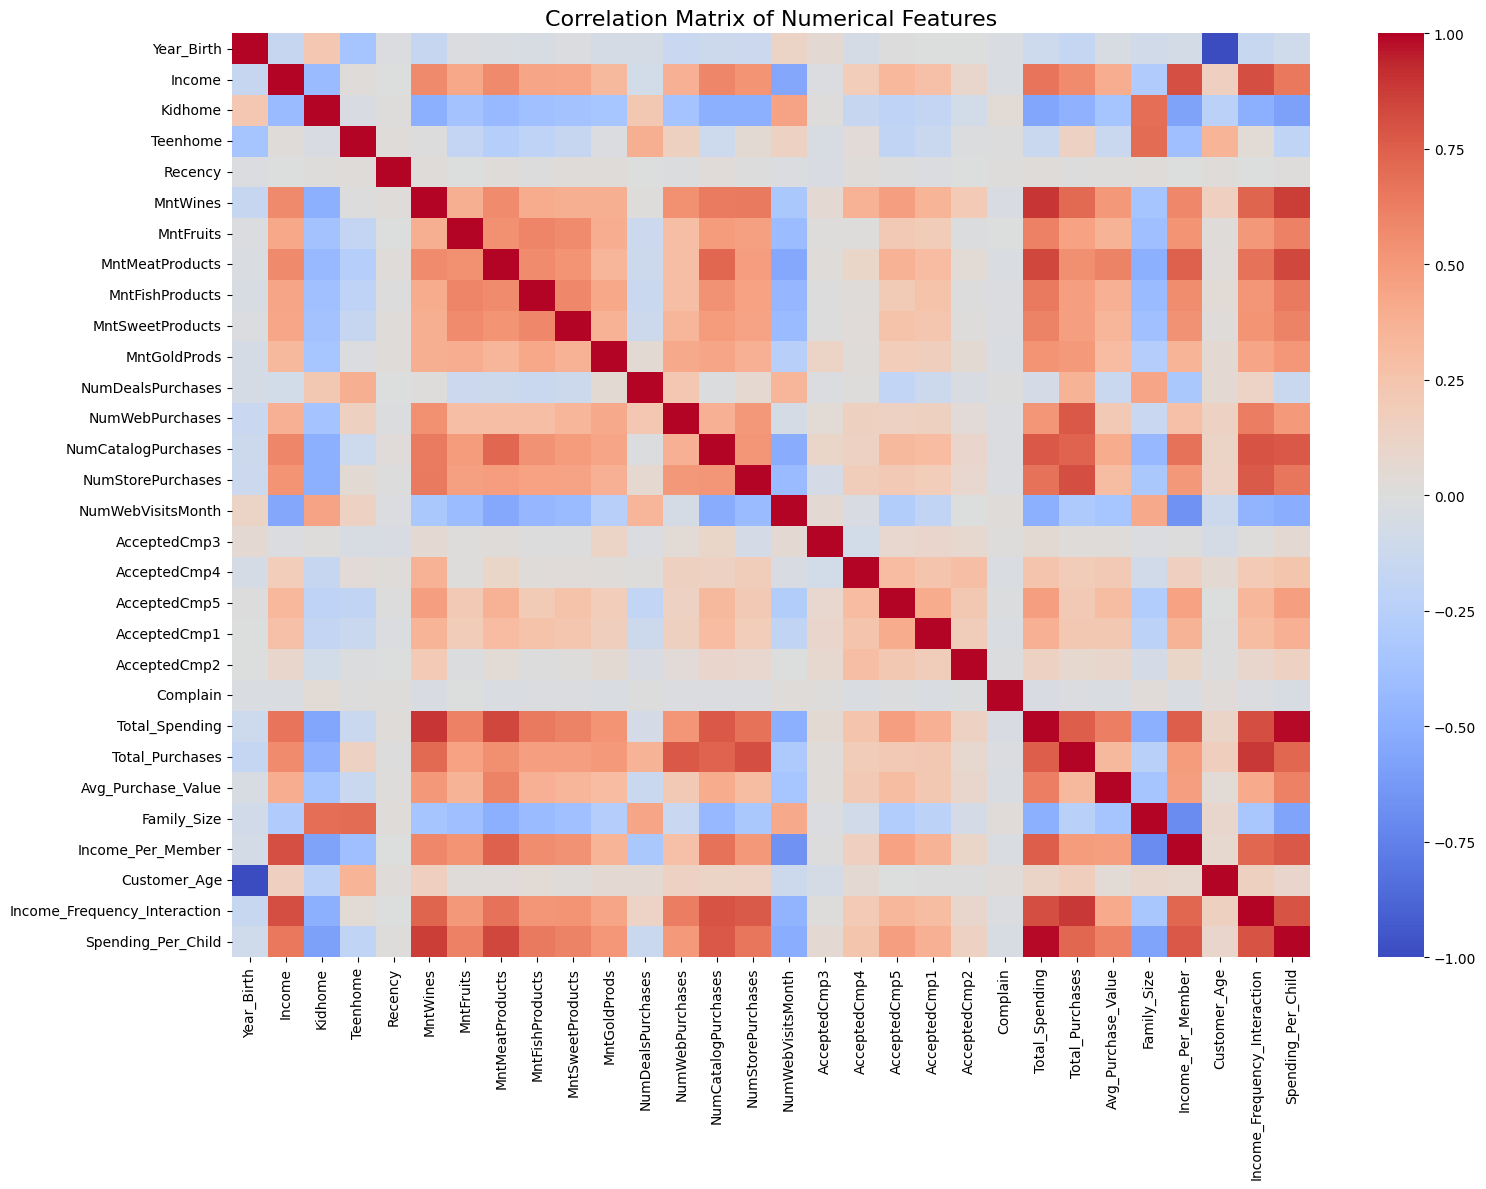

Highly correlated feature pairs (correlation > 0.8):
Income - Income_Per_Member: 0.81
Income - Income_Frequency_Interaction: 0.82
MntWines - Total_Spending: 0.89
MntWines - Spending_Per_Child: 0.87
MntMeatProducts - Total_Spending: 0.84
MntMeatProducts - Spending_Per_Child: 0.84
NumStorePurchases - Total_Purchases: 0.82
Total_Spending - Income_Frequency_Interaction: 0.82
Total_Spending - Spending_Per_Child: 0.99
Total_Purchases - Income_Frequency_Interaction: 0.89

Selected features using RFE:
['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp5', 'Total_Spending', 'Avg_Purchase_Value', 'Income_Per_Member', 'Income_Frequency_Interaction', 'Spending_Per_Child']


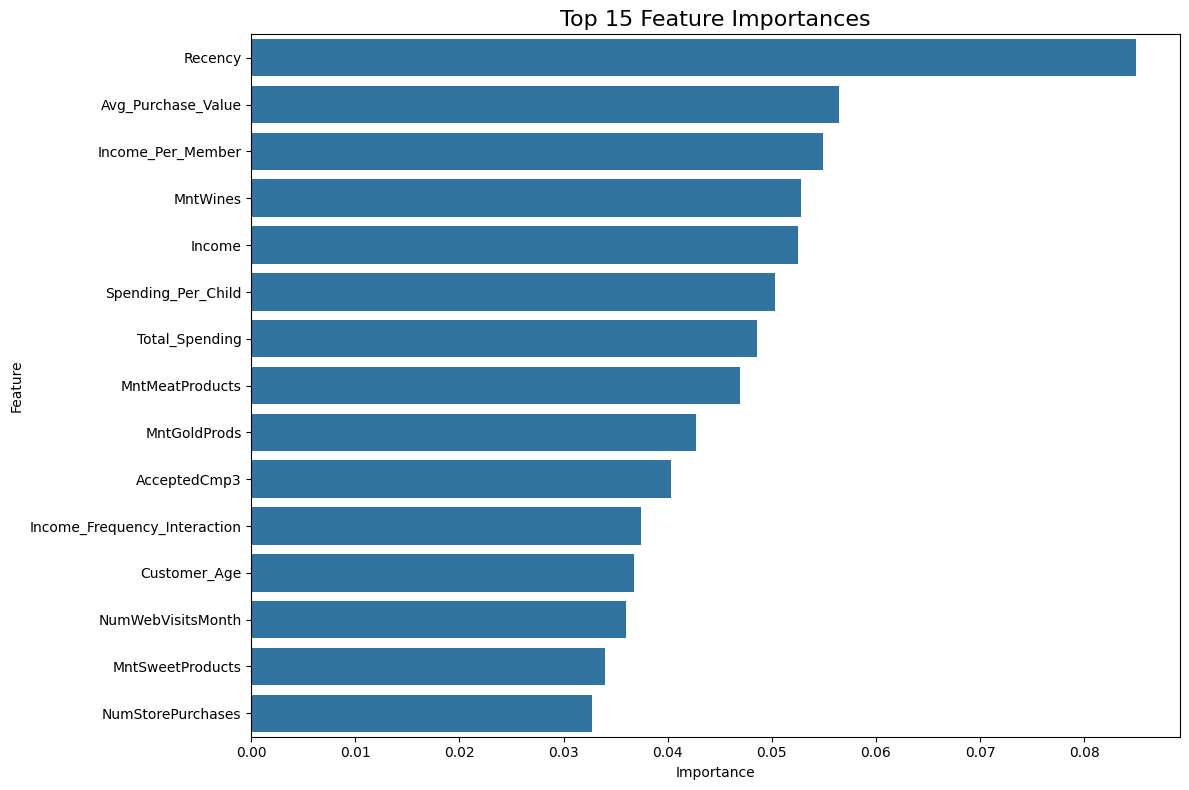


Top 15 features based on importance:
['Recency', 'Avg_Purchase_Value', 'Income_Per_Member', 'MntWines', 'Income', 'Spending_Per_Child', 'Total_Spending', 'MntMeatProducts', 'MntGoldProds', 'AcceptedCmp3', 'Income_Frequency_Interaction', 'Customer_Age', 'NumWebVisitsMonth', 'MntSweetProducts', 'NumStorePurchases']

Preprocessed data saved to 'preprocessed_data.csv'


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Load the data
data = pd.read_csv('marketing_campaign.csv', sep='\t')

# Create new features safely
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

data['Total_Purchases'] = data[['NumDealsPurchases', 'NumWebPurchases',
                                'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Avoid division by zero
data['Avg_Purchase_Value'] = np.where(
    data['Total_Purchases'] > 0,
    data['Total_Spending'] / data['Total_Purchases'],
    0
)

data['Family_Size'] = 1 + data['Kidhome'] + data['Teenhome']
data['Income_Per_Member'] = np.where(
    data['Family_Size'] > 0,
    data['Income'] / data['Family_Size'],
    0
)

data['Customer_Age'] = 2024 - data['Year_Birth']
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
data['Years_As_Customer'] = 2024 - data['Dt_Customer'].dt.year

data['Income_Frequency_Interaction'] = data['Income'] * data['Total_Purchases']

# Safe division
data['Spending_Per_Child'] = np.where(
    (data['Kidhome'] + data['Teenhome']) > 0,
    data['Total_Spending'] / (data['Kidhome'] + data['Teenhome']),
    data['Total_Spending']
)

# Select numerical features for feature selection
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [f for f in numerical_features if f not in ['ID', 'Response', 'Z_CostContact', 'Z_Revenue']]

# Handle missing values and infinities
X = data[numerical_features].replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# Correlation analysis
plt.figure(figsize=(16, 12))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Find highly correlated features (threshold > 0.8)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(column, row) for column in corr_matrix.columns for row in corr_matrix.columns
                   if upper_triangle.loc[column, row] > 0.8]

print("Highly correlated feature pairs (correlation > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.2f}")

# Target variable
y = data['Response'].fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Recursive Feature Elimination (RFE) with Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=15, step=1)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = [numerical_features[i] for i in range(len(numerical_features)) if rfe.support_[i]]
print("\nSelected features using RFE:")
print(selected_features)

# Feature importance from Random Forest
rf.fit(X_scaled, y)
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances', fontsize=16)
plt.tight_layout()
plt.show()

# Select top features based on importance
top_features = feature_importance_df.head(15)['Feature'].tolist()
print("\nTop 15 features based on importance:")
print(top_features)

# Save the preprocessed data with selected features
preprocessed_data = data[top_features + ['Response']]
preprocessed_data.to_csv('preprocessed_data.csv', index=False)
print("\nPreprocessed data saved to 'preprocessed_data.csv'")


Save the preprocessed data into a .csv file

## PCA

Select features for PCA without target variable

In [31]:
# Select features for PCA without target variable
df=data
X = df.drop('Response', axis=1)
y = df['Response']

Create a PCA object:



In [32]:
# Create a PCA object
pca = PCA()

Fit PCA to the data:



In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X_processed = preprocessor.fit_transform(X)
pca.fit(X_processed)

NameError: name 'preprocessor' is not defined

Get explained variance ratio:



In [ ]:
#code here

Determine the optimal number of components:

Analyze the explained variance ratio to determine the number of components that capture a significant portion of the variance.

In [ ]:
#code here

Transform the data:

In [ ]:
#code here

Visualize explained variance ratio:


In [ ]:
#code here

Visualize principal components:


In [ ]:
#code here

Save the PCA results into a .csv file

In [ ]:
#code here

## Model Building, Evaluation, and Comparison

### Logistic Regression

Build models with and without PCA:

Create logistic regression models using the original features and the features extracted from PCA.

In [36]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(y_test, y_pred):
    """Returns common classification metrics."""
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

def plot_confusion(y_test, y_pred, title):
    """Plots confusion matrix heatmap."""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_learning_curve(model, X, y, title):
    """Plots learning curve for given model."""
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
    plt.plot(train_sizes, test_mean, 'o-', label="Testing Accuracy")
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Prepare original dataset
X_orig = df_selected.drop("Response", axis=1)
y = df_selected["Response"]

# Prepare PCA dataset
X_pca = pc_df.drop("Response", axis=1)

NameError: name 'df_selected' is not defined

Split data into training and testing sets:

Randomly split the data into training and testing sets.

In [ ]:
#code here

Train models:

Train the logistic regression models on the training sets.

In [ ]:
#code here

Make predictions:

Use the trained models to make predictions on the testing sets.

In [ ]:
#code here

Evaluate performance:

Calculate accuracy, precision, recall, F1-score, and confusion matrix for both models.
Plot the learning curves (training and testing loss/accuracy) for both models.

In [ ]:
#code here

Visualize confusion matrices:

Create heatmaps to visualize the confusion matrices for both models.

In [ ]:
#code here

Compare performance:

Analyze the evaluation metrics and visualizations to compare the performance of the models with and without PCA.

In [ ]:
#code here

### KNN

Choose the number of neighbors:

Experiment with different values for the n_neighbors parameter to find the optimal value.

In [ ]:
#code here

Build models with and without PCA:

Create KNN models using the original features and the features extracted from PCA.

In [ ]:
#code here

Split data into training and testing sets:

Randomly split the data into training and testing sets.

In [ ]:
#code here

Train models:

Train the KNN models on the training sets.

In [ ]:
#code here

Make predictions:

Use the trained models to make predictions on the testing sets.

In [ ]:
#code here

\Calculate accuracy, precision, recall, F1-score, and confusion matrix for both models.
Plot the learning curves (training and testing loss/accuracy) for both models.

In [ ]:
#code here

Visualize confusion matrices:

Create heatmaps to visualize the confusion matrices for both models.

In [ ]:
#code here

Compare performance:

Analyze the evaluation metrics and visualizations to compare the performance of the models with and without PCA.

In [ ]:
#code here

## Decision Tree

Choose hyperparameters:

Experiment with different hyperparameters (e.g., max_depth, min_samples_split) to find the optimal values.

In [ ]:
#code here

Build models with and without PCA:

Create decision tree models using the original features and the features extracted from PCA.

In [ ]:
#code here

Split data into training and testing sets:

Randomly split the data into training and testing sets.

In [ ]:
#code here

Train models:

Train the decision tree models on the training sets.

In [ ]:
#code here

Make predictions:

Use the trained models to make predictions on the testing sets.

In [ ]:
#code here

Evaluate performance:

Calculate accuracy, precision, recall, F1-score, and confusion matrix for both models.
Plot the learning curves (training and testing loss/accuracy) for both models.

In [ ]:
#code here

Visualize decision trees:

Visualize the decision trees to understand the decision-making process.

In [ ]:
#code here

Compare performance:

Analyze the evaluation metrics and visualizations to compare the performance of the models with and without PCA.

In [ ]:
#code here

## SVM

Choose kernel:

Experiment with different kernels (e.g., linear, RBF, polynomial) to find the optimal one.

In [ ]:
#code here

Build models with and without PCA:

Create SVM models using the original features and the features extracted from PCA.

In [ ]:
#code here

Split data into training and testing sets:

Randomly split the data into training and testing sets.

In [ ]:
#code here

Train models:

Train the SVM models on the training sets.

In [ ]:
#code here

Make predictions:

Use the trained models to make predictions on the testing sets.

In [ ]:
#code here

Evaluate performance:

Calculate accuracy, precision, recall, F1-score, and confusion matrix for both models.
Plot the learning curves (training and testing loss/accuracy) for both models.

In [ ]:
#code here

Compare performance:

Analyze the evaluation metrics and visualizations to compare the performance of the models with and without PCA.

In [ ]:
#code here

## Naive Bayes

Choose a Naive Bayes variant:

Select a suitable Naive Bayes variant (e.g., Gaussian, Bernoulli, Multinomial) based on the data characteristics.

In [ ]:
#code here

Build models with and without PCA:

Create Naive Bayes models using the original features and the features extracted from PCA.

In [ ]:
#code here

Split data into training and testing sets:

Randomly split the data into training and testing sets.

In [ ]:
#code here

Train models:

Train the Naive Bayes models on the training sets.

In [ ]:
#code here

Make predictions:

Use the trained models to make predictions on the testing sets.

In [ ]:
#code here

Evaluate performance:

Calculate accuracy, precision, recall, F1-score, and confusion matrix for both models.
Plot the learning curves (training and testing loss/accuracy) for both models.

In [ ]:
#code here

Compare performance:

Analyze the evaluation metrics and visualizations to compare the performance of the models with and without PCA.

In [ ]:
#code here

## Random Forest

Choose hyperparameters:

Experiment with different hyperparameters (e.g., n_estimators, max_depth) to find the optimal values.

In [ ]:
#code here

Build models with and without PCA:

Create random forest models using the original features and the features extracted from PCA.

In [ ]:
#code here

Split data into training and testing sets:

Randomly split the data into training and testing sets.

In [ ]:
#code here

Train models:

Train the random forest models on the training sets.

In [ ]:
#code here

 Make predictions:

Use the trained models to make predictions on the testing sets.

In [ ]:
#code here

Calculate accuracy, precision, recall, F1-score, and confusion matrix for both models.
Plot the learning curves (training and testing loss/accuracy) for both models.

In [ ]:
#code here

Analyze the evaluation metrics and visualizations to compare the performance of the models with and without PCA.

In [ ]:
#code here



```
# This is formatted as code
```

## Voting Classifiers

Choose base classifiers:

Select a combination of 5 base classifiers to use in the voting classifier.

In [ ]:
#code here

Build models with and without PCA:

Create voting classifier models using the original features and the features extracted from PCA.

In [ ]:
#code here

Split data into training and testing sets:

Randomly split the data into training and testing sets.

In [ ]:
#code here

Train models:

Train the voting classifier models on the training sets.

In [ ]:
#code here

Make predictions:

Use the trained models to make predictions on the testing sets.

In [ ]:
#code here

Evaluate performance:

Calculate accuracy, precision, recall, F1-score, and confusion matrix for both models.
Plot the learning curves (training and testing loss/accuracy) for both models.

In [ ]:
#code here

Compare performance:

Analyze the evaluation metrics and visualizations to compare the performance of the models with and without PCA.

In [ ]:
#code here

## Boosting

Select 3 boosting algorithms (AdaBoost, Gradient Boosting, XGBoost)

In [ ]:
#code here

Build models with and without PCA:

Create boosting models using the original features and the features extracted from PCA.

In [ ]:
#code here

Split data into training and testing sets:

Randomly split the data into training and testing sets.

In [ ]:
#code here

Train models:

Train the boosting models on the training sets.

In [ ]:
#code here

Make predictions:

Use the trained models to make predictions on the testing sets.

In [ ]:
#code here

Evaluate performance:

Calculate accuracy, precision, recall, F1-score, and confusion matrix for both models.
Plot the learning curves (training and testing loss/accuracy) for both models.

In [ ]:
#code here

Compare performance:

Analyze the evaluation metrics and visualizations to compare the performance of the models with and without PCA.

In [ ]:
#code here